# 데이터 전처리

## 수치형 데이터

### 단위 환산

In [2]:
# 라이브러리 불러오기
import pandas as pd

# 데이터 읽어오기
df = pd.read_csv('./data/auto-mpg.csv', header=None)

# 열 이름을 설정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 
print(df.head(3))    
print()

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  



In [3]:
# mpg(mile per gallon)를 kpl(kilometer per liter)로 변환 (mpg_to_kpl = 0.425)
mpg_to_kpl = 1.60934 / 3.78541

# mpg 열에 0.425를 곱한 결과를 새로운 열(kpl)에 추가
df['kpl'] = df['mpg'] * mpg_to_kpl
print(df.head(3))    
print()

# kpl 열을 소수점 아래 둘째 자리에서 반올림 
df['kpl'] = df['kpl'].round(2)
print(df.head(3)) 

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   

   origin                       name       kpl  
0       1  chevrolet chevelle malibu  7.652571  
1       1          buick skylark 320  6.377143  
2       1         plymouth satellite  7.652571  

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   

   origin                       name   kpl  
0       1  chevrolet chevelle malibu  7.65  
1       1          buick skylark 320  6.38  
2       1         

### 자료형 변환 

In [4]:
# 각 열의 자료형 확인
print(df.dtypes)   
print()

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
name             object
kpl             float64
dtype: object



In [5]:
#horsepower 열의 값 확인
print(df.horsepower.unique())

['130.0' '165.0' '150.0' '140.0' '198.0' '220.0' '215.0' '225.0' '190.0'
 '170.0' '160.0' '95.00' '97.00' '85.00' '88.00' '46.00' '87.00' '90.00'
 '113.0' '200.0' '210.0' '193.0' '?' '100.0' '105.0' '175.0' '153.0'
 '180.0' '110.0' '72.00' '86.00' '70.00' '76.00' '65.00' '69.00' '60.00'
 '80.00' '54.00' '208.0' '155.0' '112.0' '92.00' '145.0' '137.0' '158.0'
 '167.0' '94.00' '107.0' '230.0' '49.00' '75.00' '91.00' '122.0' '67.00'
 '83.00' '78.00' '52.00' '61.00' '93.00' '148.0' '129.0' '96.00' '71.00'
 '98.00' '115.0' '53.00' '81.00' '79.00' '120.0' '152.0' '102.0' '108.0'
 '68.00' '58.00' '149.0' '89.00' '63.00' '48.00' '66.00' '139.0' '103.0'
 '125.0' '133.0' '138.0' '135.0' '142.0' '77.00' '62.00' '132.0' '84.00'
 '64.00' '74.00' '116.0' '82.00']


In [6]:
# 누락 데이터('?') 삭제 
import numpy as np
df['horsepower'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)   # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')      # 문자열을 실수형으로 변환

# horsepower 열의 자료형 확인
print(df['horsepower'].dtypes)  
print()

# horsepower 열의 고유값 확인
print(df['horsepower'].unique())

float64

[130. 165. 150. 140. 198. 220. 215. 225. 190. 170. 160.  95.  97.  85.
  88.  46.  87.  90. 113. 200. 210. 193. 100. 105. 175. 153. 180. 110.
  72.  86.  70.  76.  65.  69.  60.  80.  54. 208. 155. 112.  92. 145.
 137. 158. 167.  94. 107. 230.  49.  75.  91. 122.  67.  83.  78.  52.
  61.  93. 148. 129.  96.  71.  98. 115.  53.  81.  79. 120. 152. 102.
 108.  68.  58. 149.  89.  63.  48.  66. 139. 103. 125. 133. 138. 135.
 142.  77.  62. 132.  84.  64.  74. 116.  82.]


In [7]:
# origin 열의 고유값 확인
print(df['origin'].unique())
print()

# 정수형 데이터를 문자형 데이터로 변환 
df['origin'].replace({1:'USA', 2:'EU', 3:'JAPAN'}, inplace=True)
# origin 열의 고유값과 자료형 확인
print(df['origin'].unique())
print()

print(df['origin'].dtypes) 

[1 3 2]

['USA' 'JAPAN' 'EU']

object


In [8]:
# origin 열의 문자열 자료형을 범주형으로 변환
df['origin'] = df['origin'].astype('category')     
print(df['origin'].dtypes)
print()

# 범주형을 문자열로 다시 변환
df['origin'] = df['origin'].astype('str')     
print(df['origin'].dtypes)
print()

# model year 열의 정수형을 범주형으로 변환
print(df['model year'].sample(3))
print()

df['model year'] = df['model year'].astype('category') 
print(df['model year'].sample(3))

category

object

376    82
0      70
114    73
Name: model year, dtype: int64

88     73
182    76
362    81
Name: model year, dtype: category
Categories (13, int64): [70, 71, 72, 73, ..., 79, 80, 81, 82]


### 표준화

In [9]:
import pandas as pd
df = pd.read_csv("data/student.csv", encoding='ms949', index_col ='이름')
print(df)

     국어  영어  수학
이름             
박지영  90  85  55
김태함  70  65  80
김효섭  92  95  76
임경희  76  89  88
권혁진  97  87  83
하혜진  80  86  97
이준원  20  30  40
윤정웅  50  52  54
주시현  95  70  80


<AxesSubplot:xlabel='이름'>

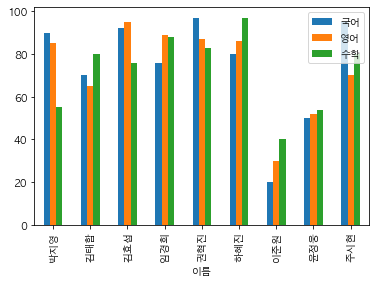

In [10]:
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc
#매킨토시의 경우
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
#윈도우의 경우
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

df.plot(kind='bar')

     국어  영어  수학     국어표준값     영어표준값     수학표준값      국어편차값      영어편차값      수학편차값
이름                                                                            
박지영  90  85  55  0.616320  0.554321 -0.941716  56.163201  55.543208  40.582843
김태함  70  65  80 -0.176091 -0.386979  0.399335  48.239085  46.130213  53.993351
김효섭  92  95  76  0.695561  1.024971  0.184767  56.955613  60.249706  51.847670
임경희  76  89  88  0.061632  0.742581  0.828471  50.616320  57.425807  58.284714
권혁진  97  87  83  0.893664  0.648451  0.560261  58.936642  56.484508  55.602612
하혜진  80  86  97  0.220114  0.601386  1.311250  52.201143  56.013858  63.112497
이준원  20  30  40 -2.157120 -2.034253 -1.746346  28.428796  29.657471  32.536538
윤정웅  50  52  54 -0.968503 -0.998823 -0.995358  40.314970  40.011766  40.046423
주시현  95  70  80  0.814423 -0.151654  0.399335  58.144230  48.483462  53.993351


<AxesSubplot:xlabel='이름'>

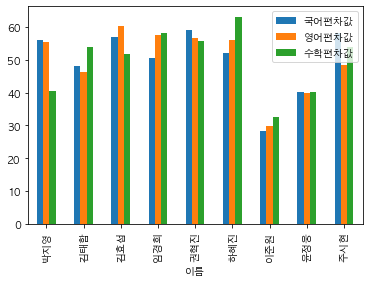

In [11]:
kormean, korstd = df['국어'].mean(), df['국어'].std()
engmean, engstd = df['영어'].mean(), df['영어'].std()
matmean, matstd = df['수학'].mean(), df['수학'].std()

df['국어표준값'] = (df['국어'] - kormean)/korstd
df['영어표준값'] = (df['영어'] - engmean)/engstd
df['수학표준값'] = (df['수학'] - matmean)/matstd

df['국어편차값'] = df['국어표준값'] * 10 + 50
df['영어편차값'] = df['영어표준값'] * 10 + 50
df['수학편차값'] = df['수학표준값'] * 10 + 50

print(df)

df[['국어편차값','영어편차값','수학편차값']].plot(kind='bar')

In [12]:
# 데이터 읽어오기
df = pd.read_csv('data/auto-mpg.csv', header=None)

# 열 이름을 설정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

# horsepower 열의 누락 데이터('?') 삭제하고 실수형으로 변환
df['horsepower'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)   # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')      # 문자열을 실수형으로 변환

# horsepower 열의 통계 요약정보로 최대값(max)을 확인
print(df.horsepower.describe())
print()

# horsepower 열의 최대값의 절대값으로 모든 데이터를 나눠서 저장
df.maxhorsepower = df.horsepower / abs(df.horsepower.max()) 

print(df.maxhorsepower.head())
print()

print(df.maxhorsepower.describe())

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64

0    0.565217
1    0.717391
2    0.652174
3    0.652174
4    0.608696
Name: horsepower, dtype: float64

count    392.000000
mean       0.454215
std        0.167353
min        0.200000
25%        0.326087
50%        0.406522
75%        0.547826
max        1.000000
Name: horsepower, dtype: float64


/var/folders/98/j21dd2qs46b69mwc94dgyxnr0000gn/T/ipykernel_1768/957174004.py:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.maxhorsepower = df.horsepower / abs(df.horsepower.max())


In [13]:
# horsepower 열에서 최소값을 빼기
min_x = df.horsepower - df.horsepower.min()
# horsepower 열의 최대값에서 최소값 빼기
min_max = df.horsepower.max() - df.horsepower.min()
# 최소값을 뺀 값을 최대-최소로 나누기
df.minmaxhorsepower = min_x / min_max

#0.0 ~ 1.0 사이의 값으로 만들기
print(df.minmaxhorsepower.head())
print()
print(df.minmaxhorsepower.describe())

0    0.456522
1    0.646739
2    0.565217
3    0.565217
4    0.510870
Name: horsepower, dtype: float64

count    392.000000
mean       0.317768
std        0.209191
min        0.000000
25%        0.157609
50%        0.258152
75%        0.434783
max        1.000000
Name: horsepower, dtype: float64


/var/folders/98/j21dd2qs46b69mwc94dgyxnr0000gn/T/ipykernel_1768/2842149626.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.minmaxhorsepower = min_x / min_max


### scikit-learn의 표준화 클래스

In [14]:
from sklearn import preprocessing
import numpy as np
x = df[['horsepower']].values
print('평균:', np.mean(x))
print('표준편차:', np.std(x))
print('최대값:', np.max(x))
print('최소값:', np.min(x))
print()

scaler = preprocessing.StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)
print('평균:', np.mean(x_scaled))
print('표준편차:', np.std(x_scaled))
print('최대값:', np.max(x_scaled))
print('최소값:', np.min(x_scaled))
print()

scaler = preprocessing.MinMaxScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)
print('평균:', np.mean(x_scaled))
print('표준편차:', np.std(x_scaled))
print('최대값:', np.max(x_scaled))
print('최소값:', np.min(x_scaled))
print()

scaler = preprocessing.RobustScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)
print('평균:', np.mean(x_scaled))
print('표준편차:', np.std(x_scaled))
print('최대값:', np.max(x_scaled))
print('최소값:', np.min(x_scaled))
print()

scaler = preprocessing.MaxAbsScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)
print('평균:', np.mean(x_scaled))
print('표준편차:', np.std(x_scaled))
print('최대값:', np.max(x_scaled))
print('최소값:', np.min(x_scaled))

평균: 104.46938775510205
표준편차: 38.44203271442593
최대값: 230.0
최소값: 46.0

평균: -1.812609019796174e-16
표준편차: 0.9999999999999998
최대값: 3.2654519904664348
최소값: -1.5209754434541274

평균: 0.3177684117125111
표준편차: 0.20892409083927133
최대값: 1.0
최소값: 0.0

평균: 0.2150860344137655
표준편차: 0.7537653473416848
최대값: 2.676470588235294
최소값: -0.9313725490196079

평균: 0.45421472937000884
표준편차: 0.16713927267141707
최대값: 1.0
최소값: 0.2


In [15]:
from sklearn.preprocessing import MaxAbsScaler
X = [[ 1., -1.,  2.],
[ 2.,  0.,  0.],
[ 0.,  1., -1.]]
transformer = MaxAbsScaler().fit(X)
transformer.transform(X)

array([[ 0.5, -1. ,  1. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. , -0.5]])

### 서울시 구별 범죄현황 HeatMap

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

criminal = pd.read_csv('./data/crime.txt', sep='\t', thousands=',', encoding='utf-8')
print(criminal.head(5))
criminal.info()

     기간  자치구    합계발생   합계검거  살인발생  살인검거  강도발생  강도검거  강간발생  강간검거   절도발생   절도검거  \
0  2016   합계  117839  84421   148   147   262   257  6002  5565  46857  22566   
1  2016  종로구    4459   4298     6     5    12    14   238  1106   1940   1020   
2  2016   중구    4584   3068     3     3     8     7   198   148   2150    914   
3  2016  용산구    4137   2835     4     4     9    10   251   214   1489    599   
4  2016  성동구    3026   2392     4     5     3     5   104    78   1296    896   

    폭력발생   폭력검거  
0  64570  55886  
1   2263   2153  
2   2225   1996  
3   2384   2008  
4   1619   1408  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   기간      26 non-null     int64 
 1   자치구     26 non-null     object
 2   합계발생    26 non-null     int64 
 3   합계검거    26 non-null     int64 
 4   살인발생    26 non-null     int64 
 5   살인검거    26 non-null     int64 
 6   강도발생    2

In [17]:
#불필요한 컬럼 제거하기
criminal.drop(['기간', '합계검거', '살인검거', '강도검거', '강간검거', '절도검거', '폭력검거'], axis=1, inplace=True)
criminal.drop([0], inplace=True)

#컬럼 이름 설정
criminal.rename(columns={'살인발생':'살인', '강도발생':'강도', '강간발생':'강간', '절도발생':'절도', '폭력발생':'폭력'}, inplace=True)

print(criminal.head(5))

   자치구  합계발생  살인  강도   강간    절도    폭력
1  종로구  4459   6  12  238  1940  2263
2   중구  4584   3   8  198  2150  2225
3  용산구  4137   4   9  251  1489  2384
4  성동구  3026   4   3  104  1296  1619
5  광진구  5322   4  11  279  2636  2392


In [18]:
pop = pd.read_csv('./data/pop.txt',  encoding='utf-8', skiprows=2, delimiter='\t', thousands=',')
pop = pop[['자치구', '계']]
print(pop.head(5))
print()
df = pd.merge(criminal, pop)
print(df.head())

   자치구        계
0   합계  9795426
1  종로구   155106
2   중구   132259
3  용산구   240665
4  성동구   295767

   자치구  합계발생  살인  강도   강간    절도    폭력       계
0  종로구  4459   6  12  238  1940  2263  155106
1   중구  4584   3   8  198  2150  2225  132259
2  용산구  4137   4   9  251  1489  2384  240665
3  성동구  3026   4   3  104  1296  1619  295767
4  광진구  5322   4  11  279  2636  2392  355306


In [19]:
df['강간발생율'] = df['강간']/df['계']
df['강도발생율'] = df['강도']/df['계']
df['절도발생율'] = df['절도']/df['계']
df['폭력발생율'] = df['폭력']/df['계']
df['살인발생율'] = df['살인']/df['계']
print(df.head(5))

   자치구  합계발생  살인  강도   강간    절도    폭력       계     강간발생율     강도발생율     절도발생율  \
0  종로구  4459   6  12  238  1940  2263  155106  0.001534  0.000077  0.012508   
1   중구  4584   3   8  198  2150  2225  132259  0.001497  0.000060  0.016256   
2  용산구  4137   4   9  251  1489  2384  240665  0.001043  0.000037  0.006187   
3  성동구  3026   4   3  104  1296  1619  295767  0.000352  0.000010  0.004382   
4  광진구  5322   4  11  279  2636  2392  355306  0.000785  0.000031  0.007419   

      폭력발생율     살인발생율  
0  0.014590  0.000039  
1  0.016823  0.000023  
2  0.009906  0.000017  
3  0.005474  0.000014  
4  0.006732  0.000011  


In [20]:
#데이터 읽어오기
cctv = pd.read_excel('./data/cctv.xlsx')

cctv.rename(columns={cctv.columns[0] : '구별'}, inplace=True)
gu = []
for x in cctv['구별']:
    gu.append(x.replace(' ', ''))
cctv['구별'] = gu

#불필요한 컬럼 삭제
cctv.drop(['2011년 이전', '2012년', '2013년', '2014년', '2015년', '2016년', '2017년','2018년',], axis=1, inplace=True)

df = pd.merge(df, cctv, left_on='자치구', right_on='구별')
print(df.head())

   자치구  합계발생  살인  강도   강간    절도    폭력       계     강간발생율     강도발생율     절도발생율  \
0  종로구  4459   6  12  238  1940  2263  155106  0.001534  0.000077  0.012508   
1   중구  4584   3   8  198  2150  2225  132259  0.001497  0.000060  0.016256   
2  용산구  4137   4   9  251  1489  2384  240665  0.001043  0.000037  0.006187   
3  성동구  3026   4   3  104  1296  1619  295767  0.000352  0.000010  0.004382   
4  광진구  5322   4  11  279  2636  2392  355306  0.000785  0.000031  0.007419   

      폭력발생율     살인발생율   구별    소계  
0  0.014590  0.000039  종로구  1471  
1  0.016823  0.000023   중구  1544  
2  0.009906  0.000017  용산구  2063  
3  0.005474  0.000014  성동구  2679  
4  0.006732  0.000011  광진구  1581  


In [21]:
#자치구 컬럼을 인덱스로 설정하기 위해서 피봇 테이블 호출
df = pd.pivot_table(df, index='자치구', aggfunc=np.sum)
print(df)

       강간     강간발생율  강도     강도발생율       계  살인     살인발생율    소계    절도     절도발생율  \
자치구                                                                             
강남구   516  0.000962  39  0.000073  536107   5  0.000009  5221  3587  0.006691   
강동구   160  0.000341  14  0.000030  469094   4  0.000009  1879  1754  0.003739   
강북구   217  0.000709   5  0.000016  306093   7  0.000023  1265  1222  0.003992   
강서구   275  0.000472  10  0.000017  582995   9  0.000015  1617  1952  0.003348   
관악구   322  0.000641  12  0.000024  502698   6  0.000012  3985  2103  0.004183   
광진구   279  0.000785  11  0.000031  355306   4  0.000011  1581  2636  0.007419   
구로구   273  0.000643  10  0.000024  424582   9  0.000021  3227  1910  0.004499   
금천구   175  0.000715   7  0.000029  244685   6  0.000025  1634  1264  0.005166   
노원구   159  0.000306   6  0.000012  520005   5  0.000010  1906  1857  0.003571   
도봉구   123  0.000381   5  0.000016  322419   3  0.000009   858   866  0.002686   
동대문구  190  0.000539  10  0.0

In [22]:
#데이터 표준화 하기
#가장 큰 데이터를 1.0으로 하고 가장 작은 데이터를 0.0으로 설정해서 값을 만들기
from sklearn import preprocessing
col = ['강간발생율', '강도발생율', '살인발생율', '절도발생율', '폭력발생율']

x = df[col].values
min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(x.astype(float))
criminal_norm = pd.DataFrame(x_scaled, columns = col, index = df.index)
print(criminal_norm)

         강간발생율     강도발생율     살인발생율     절도발생율     폭력발생율
자치구                                                   
강남구   0.541005  0.931277  0.026509  0.295127  0.259736
강동구   0.042309  0.293078  0.000000  0.077610  0.095868
강북구   0.337518  0.092108  0.475584  0.096264  0.387152
강서구   0.147134  0.104275  0.229156  0.048805  0.103967
관악구   0.282633  0.204216  0.113029  0.110352  0.178287
광진구   0.398754  0.309656  0.090556  0.348784  0.201777
구로구   0.284592  0.199476  0.420155  0.133573  0.258716
금천구   0.342550  0.274683  0.530381  0.182747  0.378203
노원구   0.013966  0.020755  0.036086  0.065230  0.051969
도봉구   0.074737  0.079803  0.025785  0.000000  0.022773
동대문구  0.201443  0.271410  0.187923  0.207911  0.262523
동작구   0.425177  0.111254  0.385074  0.029508  0.000000
마포구   0.611266  0.005707  0.066311  0.292139  0.281063
서대문구  0.210640  0.083231  0.343503  0.150696  0.161236
서초구   0.582179  0.307183  0.109974  0.186957  0.107309
성동구   0.050771  0.000000  0.165707  0.124973  0.102238
성북구   0.04

In [23]:
col = ['강간', '강도', '살인', '절도', '폭력', '계', '소계']
criminal_norm[col] = df[col]
print(criminal_norm.head(5))

        강간발생율     강도발생율     살인발생율     절도발생율     폭력발생율   강간  강도  살인    절도  \
자치구                                                                        
강남구  0.541005  0.931277  0.026509  0.295127  0.259736  516  39   5  3587   
강동구  0.042309  0.293078  0.000000  0.077610  0.095868  160  14   4  1754   
강북구  0.337518  0.092108  0.475584  0.096264  0.387152  217   5   7  1222   
강서구  0.147134  0.104275  0.229156  0.048805  0.103967  275  10   9  1952   
관악구  0.282633  0.204216  0.113029  0.110352  0.178287  322  12   6  2103   

       폭력       계    소계  
자치구                      
강남구  4002  536107  5221  
강동구  2530  469094  1879  
강북구  2778  306093  1265  
강서구  3204  582995  1617  
관악구  3235  502698  3985  


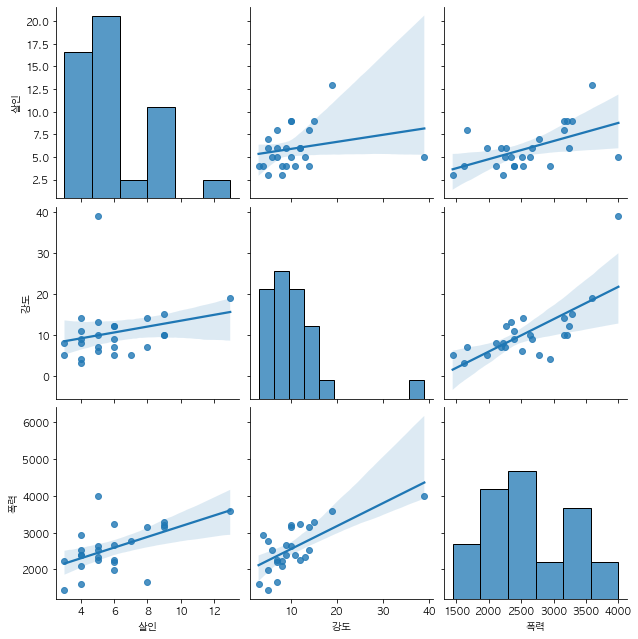

In [23]:
import platform
from matplotlib import font_manager, rc
#매킨토시의 경우
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
#윈도우의 경우
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
    rc('font', family=font_name)

#강도, 살인, 폭력 의 상관관계 그래프 만들기
sns.pairplot(criminal_norm, vars=["살인", "강도", "폭력"], kind='reg', height=3)
plt.show()

/Users/adam/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


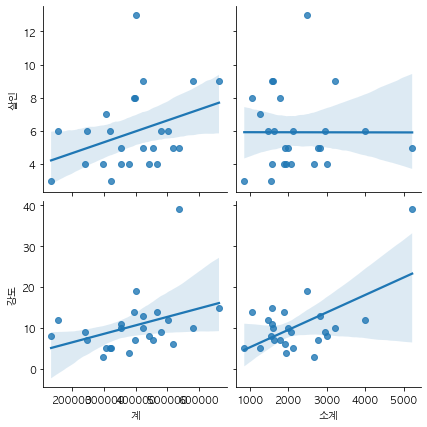

In [24]:
#인구수와 CCTV 개수와 살인, 강도의 상관관계
sns.pairplot(criminal_norm, x_vars=['계', '소계'], y_vars=["살인", "강도"], kind='reg', size=3)
plt.show()

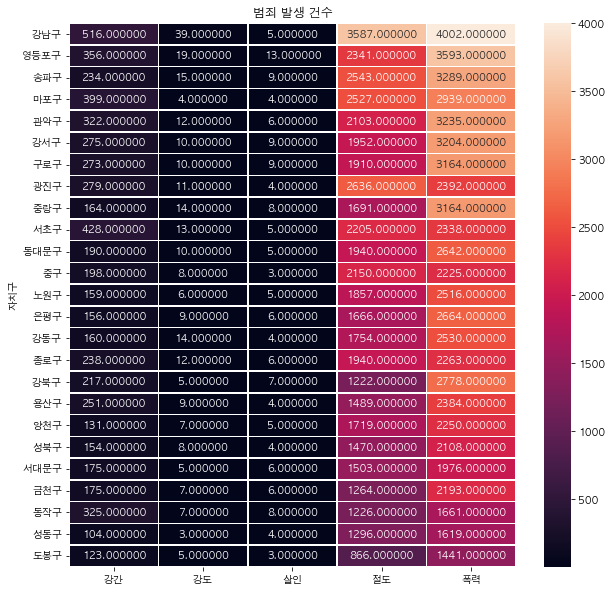

In [25]:
target_col = ['강간', '강도', '살인', '절도', '폭력']
criminal_norm['사건발생'] = np.sum(criminal_norm[target_col], axis=1)
criminal_norm_sort = criminal_norm.sort_values(by='사건발생', ascending=False)
plt.figure(figsize = (10,10))
sns.heatmap(criminal_norm_sort[target_col], annot=True, fmt='f',linewidths=.5,)
plt.title('범죄 발생 건수')
plt.show()

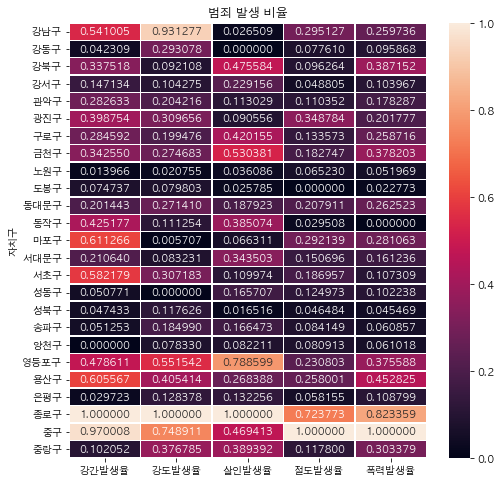

In [26]:
plt.figure(figsize=(8,8))
target_col = ['강간발생율', '강도발생율', '살인발생율', '절도발생율', '폭력발생율']
sns.heatmap(criminal_norm[target_col], annot=True, fmt='f',linewidths=.5,)
plt.title('범죄 발생 비율')
plt.show()

### 정규화

In [27]:
# 라이브러리를 임포트합니다.
import numpy as np
from sklearn.preprocessing import Normalizer

# 특성 행렬을 만듭니다.
features = np.array([[1, 2],
                     [2, 3],
                     [3, 8],
                     [4, 2],
                     [7, 2]])

# 변환기 객체를 만듭니다.
normalizer = Normalizer(norm="l2")

# 특성 행렬을 변환합니다.
features_l2_norm = normalizer.transform(features)
print(features_l2_norm)

[[0.4472136  0.89442719]
 [0.5547002  0.83205029]
 [0.35112344 0.93632918]
 [0.89442719 0.4472136 ]
 [0.96152395 0.27472113]]


In [28]:
# 변환기 객체를 만듭니다.
normalizer = Normalizer(norm = "l1")

# 특성 행렬을 변환합니다.
features_l1_norm = normalizer.transform(features)
print(features_l1_norm)

[[0.33333333 0.66666667]
 [0.4        0.6       ]
 [0.27272727 0.72727273]
 [0.66666667 0.33333333]
 [0.77777778 0.22222222]]


In [29]:
# 변환기 객체를 만듭니다.
normalizer = Normalizer(norm = "max")

# 특성 행렬을 변환합니다.
features_l1_norm = normalizer.transform(features)
print(features_l1_norm)

[[0.5        1.        ]
 [0.66666667 1.        ]
 [0.375      1.        ]
 [1.         0.5       ]
 [1.         0.28571429]]


### 다항 특성 과 교차항 특성

In [30]:
# 라이브러리를 임포트합니다.
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

# 특성 행렬을 만듭니다.
features = np.array([[2, 3],
                     [1, 2],
                     [22, 6]])

# PolynomialFeatures 객체를 만듭니다.
polynomial_interaction = PolynomialFeatures(degree=2, include_bias=False)

# 다항 특성을 만듭니다.
polynomial_interaction.fit_transform(features)

array([[  2.,   3.,   4.,   6.,   9.],
       [  1.,   2.,   1.,   2.,   4.],
       [ 22.,   6., 484., 132.,  36.]])

In [31]:
# PolynomialFeatures 객체를 만듭니다.
polynomial_interaction = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

# 다항 특성을 만듭니다.
polynomial_interaction.fit_transform(features)

array([[  2.,   3.,   6.],
       [  1.,   2.,   2.],
       [ 22.,   6., 132.]])

In [32]:
# 상수항 1을 추가합니다.
polynomial_bias = PolynomialFeatures(degree=2, include_bias=True).fit(features)
print(polynomial_bias.transform(features))
polynomial_bias.get_feature_names()

[[  1.   2.   3.   4.   6.   9.]
 [  1.   1.   2.   1.   2.   4.]
 [  1.  22.   6. 484. 132.  36.]]


/Users/adam/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2']

### 특성 변환

In [33]:
# 라이브러리를 임포트합니다.
import numpy as np
from sklearn.preprocessing import FunctionTransformer
# 특성 행렬을 만듭니다.
features = np.array([[10, 23],
                     [2, 3]])

# 간단한 함수를 정의합니다.
def add_one(x):
    return x + 10

# 변환기 객체를 만듭니다.
one_transformer = FunctionTransformer(add_one)
# 특성 행렬을 변환합니다.
result = one_transformer.transform(features)
print(result)

[[20 33]
 [12 13]]


In [34]:
import pandas as pd

# 데이터프레임을 생성
df = pd.DataFrame(features, columns=["feature_1", "feature_2"])

# 함수를 적용
df.apply(add_one)

,feature_1,feature_2
0,20,33
1,12,13


In [35]:
FunctionTransformer(add_one, validate=False).transform(np.array([1, 2, 3]))

array([11, 12, 13])

In [36]:
from sklearn.compose import ColumnTransformer

# 100을 더하는 함수를 만듭니다.
def sub_one(x):
    return x - 1

# (이름, 변환기, 열 리스트)로 구성된 튜플의 리스트를 ColumnTransformer에 전달합니다.
ct = ColumnTransformer(
    [("add_one", FunctionTransformer(add_one, validate=True), ['feature_1']),
     ("sub_one", FunctionTransformer(sub_one, validate=True), ['feature_2'])])

ct.fit_transform(df)

array([[20, 22],
       [12,  2]])

### 연속형 데이터의 이산화

In [37]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd

# 데이터 읽어오기
df = pd.read_csv('./data/auto-mpg.csv', header=None)

# 열 이름을 설정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

df['horsepower'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)   # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')      # 문자열을 실수형으로 변환

# np.histogram 함수로 3개의 bin으로 나누는 경계 값의 리스트 구하기
count, bin_dividers = np.histogram(df['horsepower'], bins=3)
print(bin_dividers)
print()

# 3개의 bin에 이름 지정
bin_names = ['저출력', '보통출력', '고출력']

# pd.cut 함수로 각 데이터를 3개의 bin에 할당
df['hp_bin'] = pd.cut(x=df['horsepower'],     # 데이터 배열
                      bins=bin_dividers,      # 경계 값 리스트
                      labels=bin_names,       # bin 이름
                      include_lowest=True)    # 첫 경계값 포함 

# horsepower 열, hp_bin 열의 첫 10행을 출력
print(df[['horsepower', 'hp_bin']].head(10))

[ 46.         107.33333333 168.66666667 230.        ]

   horsepower hp_bin
0       130.0   보통출력
1       165.0   보통출력
2       150.0   보통출력
3       150.0   보통출력
4       140.0   보통출력
5       198.0    고출력
6       220.0    고출력
7       215.0    고출력
8       225.0    고출력
9       190.0    고출력


In [38]:
# 라이브러리를 임포트합니다.
import numpy as np

# 특성을 만듭니다.
age = np.array([[13],
                [30],
                [67],
                [36],
                [64],
                [24]])
# 30을 기준으로 분할
result = np.digitize(age, bins=[30])
print(result)
print()

#0-19, 20-29, 30-63, 64이상의 구간으로 분할
result = np.digitize(age, bins=[20,30,64])
print(result)
print()

#0-20, 21-30, 31-64, 64초과 구간으로 분할
result = np.digitize(age, bins=[20,30,64], right=True)
print(result)
print()


[[0]
 [1]
 [1]
 [1]
 [1]
 [0]]

[[0]
 [2]
 [3]
 [2]
 [3]
 [1]]

[[0]
 [1]
 [3]
 [2]
 [2]
 [1]]



In [39]:
from sklearn.preprocessing import Binarizer
print(age)

# Binarizer 객체를 만듭니다. 
binarizer = Binarizer(threshold=30.0)

# 특성을 변환합니다.
print(binarizer.transform(age))

[[13]
 [30]
 [67]
 [36]
 [64]
 [24]]
[[0]
 [0]
 [1]
 [1]
 [1]
 [0]]


In [40]:
from sklearn.preprocessing import KBinsDiscretizer
# 네 개의 구간으로 나눕니다.
kb = KBinsDiscretizer(4, encode='ordinal', strategy='quantile')
print(kb.fit_transform(age))
print()

#희소행렬 리턴
kb = KBinsDiscretizer(4, encode='onehot', strategy='quantile')
print(kb.fit_transform(age))
print()

#밀집행렬 리턴
kb = KBinsDiscretizer(4, encode='onehot-dense', strategy='quantile')
print(kb.fit_transform(age))
print()

#밀집행렬 리턴
kb = KBinsDiscretizer(4, encode='onehot-dense', strategy='uniform')
print(kb.fit_transform(age))
print()

#구간의 값 확인
print(kb.bin_edges_)

[[0.]
 [1.]
 [3.]
 [2.]
 [3.]
 [0.]]

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 3)	1.0
  (3, 2)	1.0
  (4, 3)	1.0
  (5, 0)	1.0

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]

[array([13. , 26.5, 40. , 53.5, 67. ])]


In [41]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

# 모의 특성 행렬을 생성
sample = np.array([[13, 30],
                [30, 40],
                [67, 44],
                [36, 24],
                [64, 37],
                [24, 46]])

# 데이터프레임을 생성
dataframe = pd.DataFrame(sample, columns=["feature_1", "feature_2"])
print(dataframe)
print()

# k-평균 군집 모델을 생성
clusterer = KMeans(3, random_state=0)

# 모델을 훈련
clusterer.fit(sample)

# 그룹 소속을 예측
dataframe["group"] = clusterer.predict(sample)

# 처음 몇 개의 샘플을 조회
print(dataframe.head(5))

   feature_1  feature_2
0         13         30
1         30         40
2         67         44
3         36         24
4         64         37
5         24         46

   feature_1  feature_2  group
0         13         30      1
1         30         40      1
2         67         44      0
3         36         24      2
4         64         37      0


### 이상치 감지

In [42]:
#Z 점수를 이용하는 방법
import numpy as np

def outliers_z_score(ys):
    threshold = 3

    mean_y = np.mean(ys)
    print("평균:", mean_y)
    stdev_y = np.std(ys)
    print("표준편차:", stdev_y)
    z_scores = [(y - mean_y) / stdev_y for y in ys]
    print("z_score:", z_scores)
    return np.where(np.abs(z_scores) > threshold)

features = np.array([[10, 10, 7, 6, 4, 4, 3,3],
                     [20000, 3, 5, 9, 2, 2, 2, 2]])
print(outliers_z_score(features))

평균: 1254.5
표준편차: 4840.068065120572
z_score: [array([-0.25712448, -0.25712448, -0.25774431, -0.25795092, -0.25836414,
       -0.25836414, -0.25857074, -0.25857074]), array([ 3.87298272, -0.25857074, -0.25815753, -0.25733109, -0.25877735,
       -0.25877735, -0.25877735, -0.25877735])]
(array([1]), array([0]))


In [43]:
#Z 점수를 보완해서 이용하는 방법
def outliers_modified_z_score(ys):
    threshold = 3.5

    median_y = np.median(ys)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in ys])
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
                         for y in ys]
    return np.where(np.abs(modified_z_scores) > threshold)

print(outliers_modified_z_score(features))

(array([1]), array([0]))


In [44]:
#Z 점수를 보완해서 이용하는 방법
features = np.array([[10, 10, 7, 6, 4],
                     [20000, 3, 5, 9, 2]])
print(outliers_z_score(features))

def outliers_modified_z_score(ys):
    threshold = 3.5

    median_y = np.median(ys)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in ys])
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
                         for y in ys]
    return np.where(np.abs(modified_z_scores) > threshold)

print(outliers_modified_z_score(features))

평균: 2005.6
표준편차: 5998.133929815172
z_score: [array([-0.33270347, -0.33270347, -0.33320363, -0.33337035, -0.33370379]), array([ 2.9999997 , -0.3338705 , -0.33353707, -0.33287019, -0.33403722])]
(array([], dtype=int64), array([], dtype=int64))
(array([1]), array([0]))


In [45]:
#IQR 이용하는 방법
import numpy as np

def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    print("하한값:", lower_bound)
    print("상한값:", upper_bound)
    return np.where((ys > upper_bound) | (ys < lower_bound))

features = np.array([[10, 10, 7, 6, -4900],
                     [20000, 3, 5, 9, 10]])

print(outliers_iqr(features))

하한값: -1.875
상한값: 17.125
(array([0, 1]), array([4, 0]))


In [46]:
# 라이브러리를 임포트합니다.
import numpy as np
from sklearn.covariance import EllipticEnvelope
from sklearn.datasets import make_blobs

# 모의 데이터를 만듭니다.
features, _ = make_blobs(n_samples = 10,
                         n_features = 2,
                         centers = 1,
                         random_state = 1)
print(features)

# 첫 번째 샘플을 극단적인 값으로 바꿉니다.
features[0,0] = 10000
features[0,1] = 10000
print(features)

# 이상치 감지 객체를 만듭니다.
outlier_detector = EllipticEnvelope(contamination=.1)

# 감지 객체를 훈련합니다.
outlier_detector.fit(features)

# 이상치를 예측합니다.
outlier_detector.predict(features)

[[-1.83198811  3.52863145]
 [-2.76017908  5.55121358]
 [-1.61734616  4.98930508]
 [-0.52579046  3.3065986 ]
 [ 0.08525186  3.64528297]
 [-0.79415228  2.10495117]
 [-1.34052081  4.15711949]
 [-1.98197711  4.02243551]
 [-2.18773166  3.33352125]
 [-0.19745197  2.34634916]]
[[ 1.00000000e+04  1.00000000e+04]
 [-2.76017908e+00  5.55121358e+00]
 [-1.61734616e+00  4.98930508e+00]
 [-5.25790464e-01  3.30659860e+00]
 [ 8.52518583e-02  3.64528297e+00]
 [-7.94152277e-01  2.10495117e+00]
 [-1.34052081e+00  4.15711949e+00]
 [-1.98197711e+00  4.02243551e+00]
 [-2.18773166e+00  3.33352125e+00]
 [-1.97451969e-01  2.34634916e+00]]


array([-1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

### 이상치 처리

In [47]:
# 라이브러리를 임포트합니다.
import numpy as np
import pandas as pd
from sklearn import preprocessing

# 데이터프레임을 만듭니다.
houses = pd.DataFrame()
houses['Price'] = [534433, 392333, 293222, 4322032]
houses['Bathrooms'] = [2, 3.5, 2, 116]
houses['Square_Feet'] = [1500, 2500, 1500, 48000]

# 불리언 조건을 기반으로 특성을 만듭니다.
houses["Outlier"] = np.where(houses["Bathrooms"] < 20, 0, 1)
# 데이터를 확인합니다.
print(houses)
print()

#특성 변환 - 로그 특성
houses["Log_Of_Square_Feet"] = [np.log(x) for x in houses["Square_Feet"]]
# 데이터를 확인합니다.
print(houses)
print()

#스케일링
df = pd.DataFrame(houses["Bathrooms"])
scaler = preprocessing.RobustScaler()
scaler.fit(df)
x_scaled = scaler.transform(df)
houses["Scale_Bathrooms"] = x_scaled
print(houses)

     Price  Bathrooms  Square_Feet  Outlier
0   534433        2.0         1500        0
1   392333        3.5         2500        0
2   293222        2.0         1500        0
3  4322032      116.0        48000        1

     Price  Bathrooms  Square_Feet  Outlier  Log_Of_Square_Feet
0   534433        2.0         1500        0            7.313220
1   392333        3.5         2500        0            7.824046
2   293222        2.0         1500        0            7.313220
3  4322032      116.0        48000        1           10.778956

     Price  Bathrooms  Square_Feet  Outlier  Log_Of_Square_Feet  \
0   534433        2.0         1500        0            7.313220   
1   392333        3.5         2500        0            7.824046   
2   293222        2.0         1500        0            7.313220   
3  4322032      116.0        48000        1           10.778956   

   Scale_Bathrooms  
0        -0.025316  
1         0.025316  
2        -0.025316  
3         3.822785  


### 결측치 조회

In [48]:
#seaborn 패키지의 titanic 데이터 가져오기
import pandas as pd
import numpy as np

# seaborn 패키지를 sns라는 이름으로 사용할 수 있도록 import
import seaborn as sns

# titanic 데이터셋 가져오기
#titanic = sns.load_dataset('titanic')
titanic = pd.read_csv('data/titanic.csv')

#데이터 확인
print(titanic.head())

#데이터 요약 정보 확인
titanic.info()

   Unnamed: 0  survived  pclass     sex   age  sibsp  parch     fare embarked  \
0           0         0       3    male  22.0      1      0   7.2500        S   
1           1         1       1  female  38.0      1      0  71.2833        C   
2           2         1       3  female  26.0      0      0   7.9250        S   
3           3         1       1  female  35.0      1      0  53.1000        S   
4           4         0       3    male  35.0      0      0   8.0500        S   

   class    who  adult_male deck  embark_town alive  alone  
0  Third    man        True  NaN  Southampton    no  False  
1  First  woman       False    C    Cherbourg   yes  False  
2  Third  woman       False  NaN  Southampton   yes   True  
3  First  woman       False    C  Southampton   yes  False  
4  Third    man        True  NaN  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  


In [49]:
print(titanic["deck"].value_counts(dropna = False))

NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: deck, dtype: int64


In [50]:
#isnull을 이용한 null 확인
print(titanic.head().isnull())
print()
#deck 가 null 인 데이터 개수 구하기
print(titanic["deck"].isnull().sum(axis=0))

   Unnamed: 0  survived  pclass    sex    age  sibsp  parch   fare  embarked  \
0       False     False   False  False  False  False  False  False     False   
1       False     False   False  False  False  False  False  False     False   
2       False     False   False  False  False  False  False  False     False   
3       False     False   False  False  False  False  False  False     False   
4       False     False   False  False  False  False  False  False     False   

   class    who  adult_male   deck  embark_town  alive  alone  
0  False  False       False   True        False  False  False  
1  False  False       False  False        False  False  False  
2  False  False       False   True        False  False  False  
3  False  False       False  False        False  False  False  
4  False  False       False   True        False  False  False  

688


### 결측치 삭제

In [51]:
import numpy as np

features = np.array([[1.1, 11.1],
                     [2.2, 22.2],
                     [3.3, 33.3],
                     [4.4, 44.4],
                     [np.nan, 55]])

#(~ 연산자를 사용하여) 누락된 값이 없는 샘플만 남김
print(features[~np.isnan(features).any(axis=1)])

[[ 1.1 11.1]
 [ 2.2 22.2]
 [ 3.3 33.3]
 [ 4.4 44.4]]


In [52]:
#컬럼별 null 데이터의 개수 찾기
print(titanic.isnull().sum(axis=0))
print()

#NaN 값이 500개 이상인 컬럼 제거
df_thresh = titanic.dropna(axis=1, thresh=500)
print(df_thresh .columns)

Unnamed: 0       0
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Index(['Unnamed: 0', 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch',
       'fare', 'embarked', 'class', 'who', 'adult_male', 'embark_town',
       'alive', 'alone'],
      dtype='object')


In [53]:
#age 열의 값이 NaN인 행 삭제
df_age = df_thresh.dropna(subset=['age'], how='any', axis=0)
df_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   714 non-null    int64  
 1   survived     714 non-null    int64  
 2   pclass       714 non-null    int64  
 3   sex          714 non-null    object 
 4   age          714 non-null    float64
 5   sibsp        714 non-null    int64  
 6   parch        714 non-null    int64  
 7   fare         714 non-null    float64
 8   embarked     712 non-null    object 
 9   class        714 non-null    object 
 10  who          714 non-null    object 
 11  adult_male   714 non-null    bool   
 12  embark_town  712 non-null    object 
 13  alive        714 non-null    object 
 14  alone        714 non-null    bool   
dtypes: bool(2), float64(2), int64(5), object(6)
memory usage: 79.5+ KB


### 결측치 대체

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns

# titanic 데이터셋 가져오기
titanic = sns.load_dataset('titanic')

# embark_town 열의 829행의 NaN 데이터 출력
print(titanic['embark_town'][825:831])
print()

# embark_town 열의 NaN값을 바로 앞에 있는 828행의 값으로 변경하기
titanic['embark_town'].fillna(method='ffill', inplace=True)
print(titanic['embark_town'][825:831])
print()

#가장 많이 등장하는 값으로 변경 
titanic = sns.load_dataset('titanic')
mode = titanic['embark_town'].value_counts()
print(mode)

titanic['embark_town'].fillna(mode.idxmax(), inplace=True)
print(titanic['embark_town'][825:831])

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829            NaN
830      Cherbourg
Name: embark_town, dtype: object

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829     Queenstown
830      Cherbourg
Name: embark_town, dtype: object

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64
825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829    Southampton
830      Cherbourg
Name: embark_town, dtype: object


In [55]:
from sklearn.impute import SimpleImputer

#중간 값으로 대체하는 SimpleImputer 생성 
simple_imputer = SimpleImputer(strategy='median')
features = np.array([[100], [200], [300], [400], [500], [np.nan]])

print(features)

#중간 값으로 대체
features_simple_imputed = simple_imputer.fit_transform(features)
print(features_simple_imputed)
print("대체된 값 Imputed Value:", features_simple_imputed[5])

[[100.]
 [200.]
 [300.]
 [400.]
 [500.]
 [ nan]]
[[100.]
 [200.]
 [300.]
 [400.]
 [500.]
 [300.]]
대체된 값 Imputed Value: [300.]


In [56]:
import numpy as np
#기본 라이브러리가 아니므로 fancyimpute를 설치
from fancyimpute import KNN

features = np.array([[100, 200], [200, 250], [300, 300], [400, 290], [500, 380], [200, np.nan]])


# 특성 행렬에 있는 누락된 값을 예측합니다.
features_knn_imputed = KNN(k=5, verbose=0).fit_transform(features)

print(features_knn_imputed)

[[100.         200.        ]
 [200.         250.        ]
 [300.         300.        ]
 [400.         290.        ]
 [500.         380.        ]
 [200.         250.00000006]]


## 범주형 데이터

### 순서가 없는 범주형 데이터 만들기 

In [57]:
import numpy as np
import pandas as pd

# 데이터 읽어오기
df = pd.read_csv('./data/auto-mpg.csv', header=None)

# 열 이름을 설정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

df['horsepower'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)   # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')      # 문자열을 실수형으로 변환

# 3개의 bin에 이름 지정
bin_names = ['저출력', '보통출력', '고출력']
count, bin_dividers = np.histogram(df['horsepower'], bins=3)

# pd.cut 함수로 각 데이터를 3개의 bin에 할당
df['hp_bin'] = pd.cut(x=df['horsepower'],     # 데이터 배열
                      bins=bin_dividers,      # 경계 값 리스트
                      labels=bin_names,       # bin 이름
                      include_lowest=True)    # 첫 경계값 포함 


# hp_bin 열의 범주형 데이터를 더미 변수로 변환
horsepower_dummies = pd.get_dummies(df['hp_bin'])
print(horsepower_dummies.head(10))

   저출력  보통출력  고출력
0    0     1    0
1    0     1    0
2    0     1    0
3    0     1    0
4    0     1    0
5    0     0    1
6    0     0    1
7    0     0    1
8    0     0    1
9    0     0    1


### sklearn 이용 

In [58]:
from sklearn.preprocessing import LabelBinarizer

# 원-핫 인코더 생성
one_hot = LabelBinarizer()

# 특성을 원-핫 인코딩
print(one_hot.fit_transform(df['hp_bin']))

[[0 1 0]
 [0 1 0]
 [0 1 0]
 ...
 [0 0 1]
 [0 0 1]
 [0 0 1]]


In [59]:
#클래스 이름 학인
print(one_hot.classes_)
print()
#원래 데이터로 복원
print(one_hot.inverse_transform(one_hot.fit_transform(df['hp_bin'])))

['고출력' '보통출력' '저출력']

['보통출력' '보통출력' '보통출력' '보통출력' '보통출력' '고출력' '고출력' '고출력' '고출력' '고출력' '고출력'
 '보통출력' '보통출력' '고출력' '저출력' '저출력' '저출력' '저출력' '저출력' '저출력' '저출력' '저출력' '저출력'
 '보통출력' '저출력' '고출력' '고출력' '고출력' '고출력' '저출력' '저출력' '저출력' '저출력' '저출력' '저출력'
 '저출력' '저출력' '보통출력' '고출력' '보통출력' '보통출력' '고출력' '고출력' '고출력' '보통출력' '저출력'
 '저출력' '저출력' '저출력' '저출력' '저출력' '저출력' '저출력' '저출력' '저출력' '저출력' '저출력' '저출력'
 '저출력' '저출력' '저출력' '보통출력' '고출력' '보통출력' '보통출력' '보통출력' '고출력' '보통출력' '보통출력'
 '고출력' '저출력' '보통출력' '보통출력' '보통출력' '보통출력' '보통출력' '저출력' '저출력' '저출력' '저출력'
 '저출력' '저출력' '저출력' '저출력' '고출력' '보통출력' '보통출력' '보통출력' '보통출력' '고출력' '보통출력'
 '보통출력' '보통출력' '고출력' '고출력' '고출력' '저출력' '저출력' '저출력' '저출력' '저출력' '저출력'
 '보통출력' '보통출력' '고출력' '고출력' '저출력' '저출력' '저출력' '저출력' '저출력' '저출력' '저출력' '저출력'
 '보통출력' '고출력' '저출력' '저출력' '저출력' '보통출력' '보통출력' '보통출력' '보통출력' '고출력' '저출력'
 '저출력' '저출력' '저출력' '저출력' '저출력' '저출력' '저출력' '보통출력' '저출력' '보통출력' '보통출력'
 '보통출력' '보통출력' '보통출력' '저출력' '저출력' '저출력' '저출력' '저출력' '저출력' '저출력' '저출력'
 '저출력' '저출력' '저출력' '저출력' '저출력' '저출력' '저출

In [60]:
from sklearn.preprocessing import MultiLabelBinarizer
# 다중 클래스 특성을 생성
multiclass_feature = [("Java", "C++"),
                      ("C++", "Python"),
                      ("C#", "Java"),
                      ("JavaScript", "Java"),
                      ("Python", "R")]

# 다중 클래스 원-핫 인코더 생성
one_hot_multiclass = MultiLabelBinarizer()

# 다중 클래스 특성을 원-핫 인코딩
print(one_hot_multiclass.fit_transform(multiclass_feature))

# 클래스를 확인합니다.
print(one_hot_multiclass.classes_)

[[0 1 1 0 0 0]
 [0 1 0 0 1 0]
 [1 0 1 0 0 0]
 [0 0 1 1 0 0]
 [0 0 0 0 1 1]]
['C#' 'C++' 'Java' 'JavaScript' 'Python' 'R']


In [61]:
# sklearn 라이브러리 불러오기
from sklearn import preprocessing    

# label encoder 생성
label_encoder = preprocessing.LabelEncoder()       

# label encoder로 문자열 범주를 숫자형 범주로 변환
onehot_labeled = label_encoder.fit_transform(df['hp_bin'].head(15))  
print(onehot_labeled)

[1 1 1 1 1 0 0 0 0 0 0 1 1 0 2]


In [62]:
#one hot encoder 생성
onehot_encoder = preprocessing.OneHotEncoder()   

feature = [["Java", 1],
                      ["C++", 2],
                      ["C#", 1],
                      ["Java", 3],
                      ["Python", 2]]

# 희소행렬로 변환
onehot_fitted = onehot_encoder.fit_transform(feature)
print(onehot_fitted)

  (0, 2)	1.0
  (0, 4)	1.0
  (1, 1)	1.0
  (1, 5)	1.0
  (2, 0)	1.0
  (2, 4)	1.0
  (3, 2)	1.0
  (3, 6)	1.0
  (4, 3)	1.0
  (4, 5)	1.0


In [63]:
onehot_encoder = preprocessing.OneHotEncoder(sparse=False)   
print(dir(onehot_encoder))
feature = [["Java", 1],
                      ["C++", 2],
                      ["C#", 1],
                      ["Java", 3],
                      ["Python", 2]]

# 2차원행렬로 변환
onehot_fitted = onehot_encoder.fit_transform(feature)
print(onehot_fitted)
print()

print(onehot_encoder.categories_)

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_check_X', '_check_feature_names', '_check_n_features', '_compute_drop_idx', '_fit', '_get_feature', '_get_param_names', '_get_tags', '_more_tags', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_transform', '_validate_data', '_validate_keywords', 'categories', 'drop', 'dtype', 'fit', 'fit_transform', 'get_feature_names', 'get_feature_names_out', 'get_params', 'handle_unknown', 'inverse_transform', 'set_params', 'sparse', 'transform']
[[0. 0. 1. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 1. 0.]]

[array(['C#', 'C++', 'Java', 'Python'], dtype=objec

In [64]:
from sklearn.compose import ColumnTransformer 

feature = [["Python", 1],
                      ["C++", 2],
                      ["C#", 1],
                      ["Java", 3],
                      ["Python", 2]]

# (이름, 변환기, 열 리스트)로 구성된 튜플의 리스트를 ColumnTransformer에 전달합니다.
onehot_encoder = preprocessing.OneHotEncoder(sparse=False)  
ct = ColumnTransformer([("onehot", onehot_encoder, [0, 1])])

ct_fit = ct.fit_transform(feature)
print(ct_fit)

print()
print(ct.get_feature_names())

[[0. 0. 0. 1. 1. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 1. 0.]]

['onehot__x0_C#', 'onehot__x0_C++', 'onehot__x0_Java', 'onehot__x0_Python', 'onehot__x1_1', 'onehot__x1_2', 'onehot__x1_3']


/Users/adam/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### 순서가 있는 범주형 데이터 만들기 

In [65]:
# 라이브러리를 임포트합니다.
import pandas as pd

# 특성을 만듭니다.
dataframe = pd.DataFrame({"Score": ["저조", "보통", "보통", "저조", "우수", "매우우수", "우수"]})

scale_mapper = {"저조":1,
                "보통":2,
                "우수": 3,
                "매우우수":4}

dataframe["encoder"] = dataframe["Score"].replace(scale_mapper)
print(dataframe)

  Score  encoder
0    저조        1
1    보통        2
2    보통        2
3    저조        1
4    우수        3
5  매우우수        4
6    우수        3


In [66]:
from sklearn.preprocessing import OrdinalEncoder

features = np.array([["Low", 10],
                     ["High", 50],
                     ["Medium", 3]])

#클래스 범주를 순서대로 변환
ordinal_encoder = OrdinalEncoder()
print(ordinal_encoder.fit_transform(features))
print()

print(ordinal_encoder.categories_)

[[1. 0.]
 [0. 2.]
 [2. 1.]]

[array(['High', 'Low', 'Medium'], dtype='<U21'), array(['10', '3', '50'], dtype='<U21')]


### 디셔너리 인코딩 

In [67]:
# 라이브러리를 임포트합니다.
from sklearn.feature_extraction import DictVectorizer

# 딕셔너리를 만듭니다.
data_dict = [{"Red": 2, "Blue": 4},
             {"Red": 4, "Blue": 3},
             {"Red": 1, "Yellow": 2},
             {"Red": 2, "Yellow": 2}]

# DictVectorizer 객체를 만듭니다.
dictvectorizer = DictVectorizer(sparse=False)

# 딕셔너리를 특성 행렬로 변환합니다.
features = dictvectorizer.fit_transform(data_dict)

# 특성 행렬을 확인합니다.
print(features)
print()

# 특성 이름을 얻습니다.
feature_names = dictvectorizer.get_feature_names()

# 특성 이름을 확인합니다.
print(feature_names)

[[4. 2. 0.]
 [3. 4. 0.]
 [0. 1. 2.]
 [0. 2. 2.]]

['Blue', 'Red', 'Yellow']


/Users/adam/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [68]:
# 라이브러리를 임포트합니다.
import pandas as pd

# 특성으로 데이터프레임을 만듭니다.
pd.DataFrame(features, columns=feature_names)

,Blue,Red,Yellow
0,4.0,2.0,0.0
1,3.0,4.0,0.0
2,0.0,1.0,2.0
3,0.0,2.0,2.0


### 누락된 범주형 데이터 대체 

In [24]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# 범주형 특성을 가진 특성 행렬 생성
X = np.array([[0, 2.10, 1.45],
              [1, 1.18, 1.33],
              [0, 1.22, 1.27],
              [1, -0.21, -1.19]])

# 범주형 특성에 누락된 값이 있는 특성 행렬 생성
X_with_nan = np.array([[np.nan, 0.87, 1.31],
                       [np.nan, -0.67, -0.22]])

# KNN 학습기를 훈련
clf = KNeighborsClassifier(3, weights='distance')
trained_model = clf.fit(X[:,1:], X[:,0])

# 누락된 값의 클래스를 예측
imputed_values = trained_model.predict(X_with_nan[:,1:])
print(imputed_values)
print()

# 예측된 클래스와 원본 특성을 열로 합침
X_with_imputed = np.hstack((imputed_values.reshape(-1,1), X_with_nan[:,1:]))

# 두 특성 행렬을 연결
np.vstack((X_with_imputed, X))

[0. 1.]



array([[ 0.  ,  0.87,  1.31],
       [ 1.  , -0.67, -0.22],
       [ 0.  ,  2.1 ,  1.45],
       [ 1.  ,  1.18,  1.33],
       [ 0.  ,  1.22,  1.27],
       [ 1.  , -0.21, -1.19]])

In [25]:
from sklearn.impute import SimpleImputer

# 두 개의 특성 행렬을 합침
X_complete = np.vstack((X_with_nan, X))

#가장 자주 등장하는 데이터로 누락된 클래스 대체
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit_transform(X_complete)

array([[ 0.  ,  0.87,  1.31],
       [ 0.  , -0.67, -0.22],
       [ 0.  ,  2.1 ,  1.45],
       [ 1.  ,  1.18,  1.33],
       [ 0.  ,  1.22,  1.27],
       [ 1.  , -0.21, -1.19]])

### 불균형한 데이터 다루기 

In [71]:
from sklearn.ensemble import RandomForestClassifier
#분류기를 만들 때 가중치를 적용
weights = {0:.9, 1:.1}

rfc = RandomForestClassifier(class_weight=weights)
print(rfc)
print()

# 균형잡힌 클래스 가중치 적용 - 클래스 빈도에 반비례하게 자동으로 가중치를 생성
rfc = RandomForestClassifier(class_weight="balanced")
print(rfc)

RandomForestClassifier(class_weight={0: 0.9, 1: 0.1})

RandomForestClassifier(class_weight='balanced')


In [72]:
# 라이브러리를 임포트합니다.
import numpy as np

#0이 10개이고 1이 100개인 불균형한 데이터 만들기
list1 = []
list2 = []
for i in range(0,10,1):
    list1.append(0)
    
for i in range(0,100,1):
    list2.append(1)
    
target = np.array(list1+list2)

print(target)

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [73]:
# 각 클래스의 샘플 인덱스를 추출
i_class0 = np.where(target == 0)[0]
i_class1 = np.where(target == 1)[0]

# 각 클래스의 샘플 개수
n_class0 = len(i_class0)
n_class1 = len(i_class1)

# 클래스 0의 샘플만큼 클래스 1에서 중복을 허용하지 않고 랜덤하게 샘플을 추출
# from class 1 without replacement
i_class1_downsampled = np.random.choice(i_class1, size=n_class0, replace=False)

# 클래스 0의 타깃 벡터와 다운샘플링된 클래스 1의 타깃 벡터를 합침
np.hstack((target[i_class0], target[i_class1_downsampled]))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [74]:
# 클래스 1의 샘플 개수만큼 클래스 0에서 중복을 허용하여 랜덤하게 샘플을 선택합니다.
i_class0_upsampled = np.random.choice(i_class0, size=n_class1, replace=True)

# 클래스 0의 업샘플링된 타깃 벡터와 클래스 1의 타깃 벡터를 합칩니다.
np.concatenate((target[i_class0_upsampled], target[i_class1]))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

## 텍스트 데이터

### 텍스트 정제

In [75]:
# 텍스트를 생성
text_data = ['   Two roads diverged in a yellow wood',
'And sorry I could not travel both   ',
'And be one traveller, long I stood   ',
' And looked down one as far as I could to Where it bent in the undergrouth']

# 공백 문자를 제거
strip_whitespace = [string.strip() for string in text_data]
# 텍스트를 확인합니다.
print(strip_whitespace)

['Two roads diverged in a yellow wood', 'And sorry I could not travel both', 'And be one traveller, long I stood', 'And looked down one as far as I could to Where it bent in the undergrouth']


In [76]:
# 마침표를 제거
remove_periods = [string.replace(".", "") for string in strip_whitespace]

# 텍스트를 확인
print(remove_periods)
print()

# 함수를 생성 - 대문자로 변경해서 리턴하는 함수
def capitalizer(string: str) -> str:
    return string.upper()

# 함수를 적용
print([capitalizer(string) for string in remove_periods])

['Two roads diverged in a yellow wood', 'And sorry I could not travel both', 'And be one traveller, long I stood', 'And looked down one as far as I could to Where it bent in the undergrouth']

['TWO ROADS DIVERGED IN A YELLOW WOOD', 'AND SORRY I COULD NOT TRAVEL BOTH', 'AND BE ONE TRAVELLER, LONG I STOOD', 'AND LOOKED DOWN ONE AS FAR AS I COULD TO WHERE IT BENT IN THE UNDERGROUTH']


### 정규 표현식

In [77]:
import re
match = re.match('[0-9]', '1234')
print(match.group())
match = re.match('[0-9]', 'abc')
print(match)
match = re.match('[0-9]+', '1234')
print(match.group()) 

1
None
1234


In [78]:
import re
match = re.match('[0-9]+', ' 1234')
print(match)
match = re.match('\s[0-9]+', ' 1234')
print(match)
match = re.search('[0-9]+', ' 1234')
print(match)

None
<re.Match object; span=(0, 5), match=' 1234'>
<re.Match object; span=(1, 5), match='1234'>


In [79]:
string = '''
기상청은 슈퍼컴퓨터도 서울지역의 집중호우를 제대로 예측하지 못했다고 설명했습니다.
왜 오류가 발생했는지 자세히 분석해 예측 프로그램을 보완해야 할 대목입니다.
머신러닝 알고리즘을 이용하면 조금 더 정확한 예측을 할 수 있지 않을까 기대합니다.
박문석 기자(ggangpae1@gmail.com)
'''

import re
result = re.sub('\([a-zA-Z0-9\._+]+@[a-zA-Z]+\.(com|org|edu|net|co,kr)\)', '', string) #이메일 패턴을 찾아서 '' 으로 치환
result = re.sub('\n', '', result) #\n을 찾아서 ''으로 치환
print(result)

기상청은 슈퍼컴퓨터도 서울지역의 집중호우를 제대로 예측하지 못했다고 설명했습니다.왜 오류가 발생했는지 자세히 분석해 예측 프로그램을 보완해야 할 대목입니다.머신러닝 알고리즘을 이용하면 조금 더 정확한 예측을 할 수 있지 않을까 기대합니다.박문석 기자


### 대소문자 변환

In [80]:
string = "Hello Python"
print(string.lower())
print(string.upper())

hello python
HELLO PYTHON


### 구두점 삭제

In [81]:
#숫자에 해당하는 정규식 생성
p = re.compile('[0-9+]')
string = '★서울의 부동산 가격이 올해들어 10% 상승했습니다.!'
#숫자 제거
result = p.sub("", string)
print(result)
#특수문자를 제거하기 위해서 특수문자를 정규식으로 생성
p = re.compile("\W+")
result = p.sub(" ", result)
print(result)

★서울의 부동산 가격이 올해들어 % 상승했습니다.!
 서울의 부동산 가격이 올해들어 상승했습니다 


In [82]:
# 라이브러리를 임포트합니다.
import unicodedata
import sys

# 텍스트를 만듭니다.
text_data = ['안녕하세요!! 반갑습니다.....',
             'I Love Programming',
             'C&C++, Java, Python, C#, JavaScript, Swift, Kotlin, R, Visual Basic']

# 구두점 문자로 이루어진 딕셔너리를 만듭니다.
punctuation = dict.fromkeys(i for i in range(sys.maxunicode)
                            if unicodedata.category(chr(i)).startswith('P'))

# 문자열의 구두점을 삭제합니다.
[string.translate(punctuation) for string in text_data]

['안녕하세요 반갑습니다',
 'I Love Programming',
 'CC++ Java Python C JavaScript Swift Kotlin R Visual Basic']

### 텍스트 토큰화

In [83]:
# 라이브러리를 임포트
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

# 텍스트를 만듭니다.
string = "The science of today is the technology of tomorrow"

# 단어를 토큰으로 나눕니다.
print(word_tokenize(string))

# 텍스트를 만듭니다.
string = "The science of today is the technology of tomorrow. Tomorrow is today."

# 문장으로 나눕니다.
print(sent_tokenize(string))

['The', 'science', 'of', 'today', 'is', 'the', 'technology', 'of', 'tomorrow']
['The science of today is the technology of tomorrow.', 'Tomorrow is today.']


### 불용어 제거

In [84]:
#한글 불용어 제거
words_korean=['추석', '연휴', '민족', '대이동']
stopwords=['추석', '민족']
r = [i for i in words_korean if i not in stopwords]
print(r)

#영문 불용어제거 - NLTK 이용
from nltk.corpus import stopwords
words_english =['chief', 'justice', 'roberts', 'the', 'presedent', 'and', 'move']
r = [w for w in words_english if  not w in stopwords.words('english')]
print(r)

#영문 불용어제거 - sklearn 이용
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
r = [w for w in words_english if  not w in ENGLISH_STOP_WORDS]
print(r)

['연휴', '대이동']
['chief', 'justice', 'roberts', 'presedent', 'move']
['chief', 'justice', 'roberts', 'presedent']


In [85]:
print('NLTK:', len(stopwords.words('english')))
print(stopwords.words('english'))
print()

print('사이킷런:', len(ENGLISH_STOP_WORDS))
print(list(ENGLISH_STOP_WORDS))

NLTK: 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so',

### 어간 추출

In [86]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
string = 'All pythoners have pythoned poorly at least once'

#어간 추출기 생성
ps_stemmer =PorterStemmer()

#단어 단위로 토큰화
words=word_tokenize(string)
print(words)

#어간 추출
for w in words:
    print(ps_stemmer.stem(w), end=' ')
print()

from nltk.stem.lancaster import LancasterStemmer  
#어간 추출기 생성
ls_stemmer=LancasterStemmer()

#어간 추출
for w in words:
    print(ls_stemmer.stem(w), end=' ')

['All', 'pythoners', 'have', 'pythoned', 'poorly', 'at', 'least', 'once']
all python have python poorli at least onc 
al python hav python poor at least ont 

### n-gram

In [87]:
from nltk import ngrams
sentence = "Chief Justice, President Obama, Presedent Obama President Carter"
#연속해서 2번 나온 단어들의 뭉치 만들기
grams = ngrams(sentence.split(),2)
for gram in grams:
    print(gram)
#연속해서 3번 나온 단어들의 뭉치 만들기    
grams = ngrams(sentence.split(),3)
for gram in grams:
    print(gram)

('Chief', 'Justice,')
('Justice,', 'President')
('President', 'Obama,')
('Obama,', 'Presedent')
('Presedent', 'Obama')
('Obama', 'President')
('President', 'Carter')
('Chief', 'Justice,', 'President')
('Justice,', 'President', 'Obama,')
('President', 'Obama,', 'Presedent')
('Obama,', 'Presedent', 'Obama')
('Presedent', 'Obama', 'President')
('Obama', 'President', 'Carter')


### 형태소 분석

In [88]:
import nltk
nltk.download('averaged_perceptron_tagger')

#영문 품사 분석
from nltk import pos_tag
from nltk import word_tokenize

tokens=word_tokenize('The little yellow dog barked at the Persian cat')
print(tokens)
print()

tags_en=pos_tag(tokens)
print(tags_en)

['The', 'little', 'yellow', 'dog', 'barked', 'at', 'the', 'Persian', 'cat']

[('The', 'DT'), ('little', 'JJ'), ('yellow', 'JJ'), ('dog', 'NN'), ('barked', 'VBD'), ('at', 'IN'), ('the', 'DT'), ('Persian', 'JJ'), ('cat', 'NN')]


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/adam/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [89]:
#특정 품사만 필터링
#단어를 필터링합니다.
[word for word, tag in tags_en if tag in ['NN','NNS','NNP','NNPS']]

['dog', 'cat']

### 영문 형태소 분석 – 원 핫 인코딩 이용

In [90]:
from sklearn.preprocessing import MultiLabelBinarizer

# 텍스트를 생성
tweets = ["I am eating a burrito for breakfast",
          "Political science is an amazing field",
          "San Francisco is an awesome city"]

# 문장에 존재하는 품사를 저장할 빈 리스트를 생성
tagged_tweets = []

#list에 각 문장에 존재하는 품사를 저장
for tweet in tweets:
    tweet_tag = nltk.pos_tag(word_tokenize(tweet))
    tagged_tweets.append([tag for word, tag in tweet_tag])
    
for temp in tagged_tweets:
    print(temp)
    
# 원-핫 인코딩을 사용하여 태그를 특성으로 변환
one_hot_multi = MultiLabelBinarizer()
print(one_hot_multi.fit_transform(tagged_tweets))
print(one_hot_multi.classes_)

['PRP', 'VBP', 'VBG', 'DT', 'NN', 'IN', 'NN']
['JJ', 'NN', 'VBZ', 'DT', 'JJ', 'NN']
['NNP', 'NNP', 'VBZ', 'DT', 'JJ', 'NN']
[[1 1 0 1 0 1 1 1 0]
 [1 0 1 1 0 0 0 0 1]
 [1 0 1 1 1 0 0 0 1]]
['DT' 'IN' 'JJ' 'NN' 'NNP' 'PRP' 'VBG' 'VBP' 'VBZ']


### 영문 형태소 분석 - 품사 태깅

In [91]:
# 라이브러리를 임포트합니다.
from nltk.corpus import brown
from nltk.tag import UnigramTagger
from nltk.tag import BigramTagger
from nltk.tag import TrigramTagger

# 브라운 코퍼스에서 텍스트를 추출한 다음 문장으로 나눕니다.
sentences = brown.tagged_sents(categories='news')

# 4,000개의 문장은 훈련용으로 623개는 테스트용으로 나눕니다.
train = sentences[:4000]
test = sentences[4000:]

# 백오프 태그 객체를 만듭니다.
unigram = UnigramTagger(train)
bigram = BigramTagger(train, backoff=unigram)
trigram = TrigramTagger(train, backoff=bigram)

# 정확도를 확인합니다.
trigram.evaluate(test)

0.8174734002697437

### 한글 형태소 분석

In [1]:
from konlpy.tag import Kkma
text = '태양계는 지금으로부터 약 46억 년 전, 거대한 분자 구름의 일부분이 중력 붕괴를 일으키면서 형성되었다'

kkma = Kkma()
#문장 분석
print(kkma.sentences(text))
#단어별 분석
print(kkma.nouns(text))
#형태소 분석
print(kkma.pos(text))
print("==============================================")

from konlpy.tag import Hannanum
hannanum = Hannanum()
#단어별 분석
print(hannanum.nouns(text))
#형태소 분석 
print(hannanum.morphs(text))
print(hannanum.pos(text))
print("==============================================")

from konlpy.tag import Okt
t = Okt()
#단어별 분석
print(t.nouns(text))
#형태소 분석 
print(t.morphs(text))
print(t.pos(text))

['태양계는 지금으로부터 약 46억 년 전, 거대한 분자 구름의 일부분이 중력 붕괴를 일으키면서 형성되었다']
['태양계', '지금', '46', '46억', '억', '년', '전', '거대', '분자', '구름', '일부분', '중력', '붕괴', '형성']
[('태양계', 'NNG'), ('는', 'JX'), ('지금', 'NNG'), ('으로', 'JKM'), ('부터', 'JX'), ('약', 'MDN'), ('46', 'NR'), ('억', 'NR'), ('년', 'NNB'), ('전', 'NNG'), (',', 'SP'), ('거대', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('분자', 'NNG'), ('구름', 'NNG'), ('의', 'JKG'), ('일부분', 'NNG'), ('이', 'JKS'), ('중력', 'NNG'), ('붕괴', 'NNG'), ('를', 'JKO'), ('일으키', 'VV'), ('면서', 'ECE'), ('형성', 'NNG'), ('되', 'XSV'), ('었', 'EPT'), ('다', 'EFN')]
['태양계', '지금', '약', '46억', '년', '전', '거대', '자', '구름', '일부분', '중력', '붕괴', '형성']
['태양계', '는', '지금', '으로부터', '약', '46억', '년', '전', ',', '거대', '하', 'ㄴ', '불', 'ㄴ', '자', '구름', '의', '일부분', '이', '중력', '붕괴', '를', '일으키', '면서', '형성', '되', '었다']
[('태양계', 'N'), ('는', 'J'), ('지금', 'N'), ('으로부터', 'J'), ('약', 'N'), ('46억', 'N'), ('년', 'N'), ('전', 'N'), (',', 'S'), ('거대', 'N'), ('하', 'X'), ('ㄴ', 'E'), ('불', 'P'), ('ㄴ', 'E'), ('자', 'N'), ('구름', 'N'), ('의', 'J'), (

### BoW

In [2]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# 텍스트를 만듭니다.
text_data = np.array(['I love newziland. newziland!',
                      'Sweden is best',
                      'Germany beats both'])

# BoW 특성 행렬을 만듭니다.
count = CountVectorizer()
bag_of_words = count.fit_transform(text_data)

#희소 행렬을 출력
print(bag_of_words)
print()

#샘플의 단어 카운트 행렬을 확인
print(bag_of_words.toarray())
print()

# 특성 이름을 확인합니다.
print(count.get_feature_names())

  (0, 5)	1
  (0, 6)	2
  (1, 7)	1
  (1, 4)	1
  (1, 1)	1
  (2, 3)	1
  (2, 0)	1
  (2, 2)	1

[[0 0 0 0 0 1 2 0]
 [0 1 0 0 1 0 0 1]
 [1 0 1 1 0 0 0 0]]

['beats', 'best', 'both', 'germany', 'is', 'love', 'newziland', 'sweden']


/Users/adam/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [3]:
# 옵션을 지정하여 특성 행렬을 만듭니다.
count_2gram = CountVectorizer(ngram_range=(1,2),
                              stop_words="english",
                              vocabulary=['newziland', 'sweden'])
bag = count_2gram.fit_transform(text_data)

# 특성 행렬을 확인합니다.
print(bag.toarray())

[[2 0]
 [0 1]
 [0 0]]


### 단어의 가중치 부여

In [4]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

#텍스트를 만듭니다.
text_data = np.array(['I love Newziland. Newziland!',
                      'Sweden is best',
                      'Germany beats both',
                      'Korea is top of the top'])

# tf-idf 특성 행렬을 만듭니다.
tfidf = TfidfVectorizer()
feature_matrix = tfidf.fit_transform(text_data)

#특성 이름 파악
print(tfidf.vocabulary_)
print()

# tf-idf 특성 행렬을 확인합니다.
print(feature_matrix.toarray())

{'love': 6, 'newziland': 7, 'sweden': 9, 'is': 4, 'best': 1, 'germany': 3, 'beats': 0, 'both': 2, 'korea': 5, 'top': 11, 'of': 8, 'the': 10}

[[0.         0.         0.         0.         0.         0.
  0.4472136  0.89442719 0.         0.         0.         0.        ]
 [0.         0.61761437 0.         0.         0.48693426 0.
  0.         0.         0.         0.61761437 0.         0.        ]
 [0.57735027 0.         0.57735027 0.57735027 0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.2855815  0.36222393
  0.         0.         0.36222393 0.         0.36222393 0.72444785]]


## 시계열 데이터

### Timestamp 변환 

In [5]:
import pandas as pd

df = pd.read_csv('data/stock-data.csv', encoding='utf-8')
print(df.head())
print()

print(df.info())
print()

# 문자열 데이터를 pandas.Timestamp로 변환
df['NewDate'] = pd.to_datetime(df['Date'])   #df에 새로운 열로 추가
# 데이터 내용 및 자료형 자료형 확인
print(df.head())
print()

print(df.info())
print()

print(type(df['NewDate'][0]))

         Date  Close  Start   High    Low  Volume
0  2018-07-02  10100  10850  10900  10000  137977
1  2018-06-29  10700  10550  10900   9990  170253
2  2018-06-28  10400  10900  10950  10150  155769
3  2018-06-27  10900  10800  11050  10500  133548
4  2018-06-26  10800  10900  11000  10700   63039

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    20 non-null     object
 1   Close   20 non-null     int64 
 2   Start   20 non-null     int64 
 3   High    20 non-null     int64 
 4   Low     20 non-null     int64 
 5   Volume  20 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB
None

         Date  Close  Start   High    Low  Volume    NewDate
0  2018-07-02  10100  10850  10900  10000  137977 2018-07-02
1  2018-06-29  10700  10550  10900   9990  170253 2018-06-29
2  2018-06-28  10400  10900  10950  10150  155769 2018-06-28
3  2018-0

In [6]:
# 시계열 값으로 변환된 컬럼을 새로운 행 인덱스로 지정하고 기존의 날짜 컬럼은 삭제
df.set_index('NewDate', inplace=True)
df.drop('Date', axis=1, inplace=True)

# 데이터 내용 및 자료형 자료형 확인
print(df.head())
print()

df.info()

            Close  Start   High    Low  Volume
NewDate                                       
2018-07-02  10100  10850  10900  10000  137977
2018-06-29  10700  10550  10900   9990  170253
2018-06-28  10400  10900  10950  10150  155769
2018-06-27  10900  10800  11050  10500  133548
2018-06-26  10800  10900  11000  10700   63039

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2018-07-02 to 2018-06-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Close   20 non-null     int64
 1   Start   20 non-null     int64
 2   High    20 non-null     int64
 3   Low     20 non-null     int64
 4   Volume  20 non-null     int64
dtypes: int64(5)
memory usage: 960.0 bytes


In [7]:
# 라이브러리를 임포트합니다.
import numpy as np
import pandas as pd

# 문자열을 만듭니다.
date_strings = np.array(['03-04-2005 11:35 PM',
                         '23-05-2010 12:01 AM',
                         '04-09-2009 09:09 TM'])

# Timestamp 
print([pd.to_datetime(date, format='%d-%m-%Y %I:%M %p', errors='ignore') for date in date_strings])
print([pd.to_datetime(date, format='%d-%m-%Y %I:%M %p', errors='coerce') for date in date_strings])
print([pd.to_datetime(date, format='%d-%m-%Y %I:%M %p', errors='raise') for date in date_strings])

[Timestamp('2005-04-03 23:35:00'), Timestamp('2010-05-23 00:01:00'), '04-09-2009 09:09 TM']
[Timestamp('2005-04-03 23:35:00'), Timestamp('2010-05-23 00:01:00'), NaT]


ValueError: time data '04-09-2009 09:09 TM' does not match format '%d-%m-%Y %I:%M %p' (match)

In [8]:
# 라이브러리를 임포트합니다.
import numpy as np
import pandas as pd

# 문자열을 만듭니다.
date_strings = np.array(['03-04-2005 11:35 PM',
                         '23-05-2010 12:01 AM',
                         '04-09-2009 09:09 PM'])

pd.to_datetime(date_strings)

DatetimeIndex(['2005-03-04 23:35:00', '2010-05-23 00:01:00',
               '2009-04-09 21:09:00'],
              dtype='datetime64[ns]', freq=None)

### Period 생성 

In [9]:
# 날짜 형식의 문자열 리스트 생성
dates = ['2017-01-01', '2018-03-01', '2019-06-01']

# 문자열 리스트를 pandas.Timestamp로 변환
pddates = pd.to_datetime(dates)   
print(pddates)
print()

# Timestamp를 Period로 변환
pr_days = pddates.to_period(freq='D')
print(pr_days)
print()

pr_months = pddates.to_period(freq='M')
print(pr_months)
print()

pr_years = pddates.to_period(freq='A')
print(pr_years)

DatetimeIndex(['2017-01-01', '2018-03-01', '2019-06-01'], dtype='datetime64[ns]', freq=None)

PeriodIndex(['2017-01-01', '2018-03-01', '2019-06-01'], dtype='period[D]')

PeriodIndex(['2017-01', '2018-03', '2019-06'], dtype='period[M]')

PeriodIndex(['2017', '2018', '2019'], dtype='period[A-DEC]')


In [10]:
# Timestamp의 배열 만들기 - 월 간격, 월의 시작일 기준
ts_ms = pd.date_range(start='2018-01-01',    # 날짜 범위의 시작
                   end=None,                 # 날짜 범위의 끝
                   periods=12,                # 생성할 Timestamp의 개수
                   freq='MS',                # 시간 간격 (MS: 월의 시작일)
                   tz='Asia/Seoul')          # 시간대(timezone)
print(ts_ms)
print()

DatetimeIndex(['2018-01-01 00:00:00+09:00', '2018-02-01 00:00:00+09:00',
               '2018-03-01 00:00:00+09:00', '2018-04-01 00:00:00+09:00',
               '2018-05-01 00:00:00+09:00', '2018-06-01 00:00:00+09:00',
               '2018-07-01 00:00:00+09:00', '2018-08-01 00:00:00+09:00',
               '2018-09-01 00:00:00+09:00', '2018-10-01 00:00:00+09:00',
               '2018-11-01 00:00:00+09:00', '2018-12-01 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='MS')



In [11]:
# 월 간격, 월의 마지막 날 기준
ts_me = pd.date_range('2018-01-01', periods=12, 
                   freq='M',              # 시간 간격 (M: 월의 마지막 날)
                   tz='Asia/Seoul')       # 시간대(timezone)
print(ts_me)
print()

# 분기(3개월) 간격, 월의 마지막 날 기준
ts_3m = pd.date_range('2018-01-01', periods=12, 
                   freq='3M',             # 시간 간격 (3M: 3개월)
                   tz='Asia/Seoul')       # 시간대(timezone)
print(ts_3m)

DatetimeIndex(['2018-01-31 00:00:00+09:00', '2018-02-28 00:00:00+09:00',
               '2018-03-31 00:00:00+09:00', '2018-04-30 00:00:00+09:00',
               '2018-05-31 00:00:00+09:00', '2018-06-30 00:00:00+09:00',
               '2018-07-31 00:00:00+09:00', '2018-08-31 00:00:00+09:00',
               '2018-09-30 00:00:00+09:00', '2018-10-31 00:00:00+09:00',
               '2018-11-30 00:00:00+09:00', '2018-12-31 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='M')

DatetimeIndex(['2018-01-31 00:00:00+09:00', '2018-04-30 00:00:00+09:00',
               '2018-07-31 00:00:00+09:00', '2018-10-31 00:00:00+09:00',
               '2019-01-31 00:00:00+09:00', '2019-04-30 00:00:00+09:00',
               '2019-07-31 00:00:00+09:00', '2019-10-31 00:00:00+09:00',
               '2020-01-31 00:00:00+09:00', '2020-04-30 00:00:00+09:00',
               '2020-07-31 00:00:00+09:00', '2020-10-31 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='3M')


In [12]:
# Period 배열 만들기 - 1개월 길이
pr_m = pd.period_range(start='2018-01-01',     # 날짜 범위의 시작
                   end=None,                   # 날짜 범위의 끝
                   periods=12,                  # 생성할 Period 개수
                   freq='M')                   # 기간의 길이 (M: 월)
print(pr_m)
print()
# Period 배열 만들기 - 1시간 길이
pr_h = pd.period_range(start='2018-01-01',     # 날짜 범위의 시작
                   end=None,                   # 날짜 범위의 끝
                   periods=24,                  # 생성할 Period 개수
                   freq='H')                   # 기간의 길이 (H: 시간)
print(pr_h)
print()
# Period 배열 만들기 - 6시간 길이
pr_6h = pd.period_range(start='2018-01-01',    # 날짜 범위의 시작
                   end=None,                   # 날짜 범위의 끝
                   periods=3,                  # 생성할 Period 개수
                   freq='6H')                  # 기간의 길이 (H: 시간)
print(pr_6h)

PeriodIndex(['2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
             '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12'],
            dtype='period[M]')

PeriodIndex(['2018-01-01 00:00', '2018-01-01 01:00', '2018-01-01 02:00',
             '2018-01-01 03:00', '2018-01-01 04:00', '2018-01-01 05:00',
             '2018-01-01 06:00', '2018-01-01 07:00', '2018-01-01 08:00',
             '2018-01-01 09:00', '2018-01-01 10:00', '2018-01-01 11:00',
             '2018-01-01 12:00', '2018-01-01 13:00', '2018-01-01 14:00',
             '2018-01-01 15:00', '2018-01-01 16:00', '2018-01-01 17:00',
             '2018-01-01 18:00', '2018-01-01 19:00', '2018-01-01 20:00',
             '2018-01-01 21:00', '2018-01-01 22:00', '2018-01-01 23:00'],
            dtype='period[H]')

PeriodIndex(['2018-01-01 00:00', '2018-01-01 06:00', '2018-01-01 12:00'], dtype='period[6H]')


### 시간대 설정

In [13]:
# 라이브러리를 임포트합니다.
import pandas as pd
# 라이브러리를 임포트합니다.
from pytz import all_timezones

# 두 개의 시간대를 확인합니다.
print(all_timezones[0:2])

# datetime을 만듭니다.
print(pd.Timestamp('2017-05-01 06:00:00', tz='Europe/London'))
print()

# datetime을 만듭니다. 
date = pd.Timestamp('2017-05-01 06:00:00')

# 시간대를 지정합니다.
date_in_london = date.tz_localize('Europe/London')

# datetime을 확인합니다.
print(date_in_london)
print()

# 시간대를 바꿉니다.
print(date_in_london.tz_convert('Asia/Seoul'))
print()

# 세 개의 날짜를 만듭니다.
dates = pd.Series(pd.date_range('2/2/2002', periods=3, freq='M'))

# 시간대를 지정합니다.
print(dates.dt.tz_localize('Africa/Abidjan'))
print()

#dateutil로 시작하는 문자열로 설정
print(dates.dt.tz_localize('dateutil/Aisa/Seoul'))
print()

#pytz 객체를 직접 전달
import pytz
tz = pytz.timezone('Asia/Seoul')
print(dates.dt.tz_localize(tz))

['Africa/Abidjan', 'Africa/Accra']
2017-05-01 06:00:00+01:00

2017-05-01 06:00:00+01:00

2017-05-01 14:00:00+09:00

0   2002-02-28 00:00:00+00:00
1   2002-03-31 00:00:00+00:00
2   2002-04-30 00:00:00+00:00
dtype: datetime64[ns, Africa/Abidjan]

0   2002-02-28
1   2002-03-31
2   2002-04-30
dtype: datetime64[ns]

0   2002-02-28 00:00:00+09:00
1   2002-03-31 00:00:00+09:00
2   2002-04-30 00:00:00+09:00
dtype: datetime64[ns, Asia/Seoul]


### 년 월 일 분리

In [14]:
# 라이브러리 불러오기
import pandas as pd

# read_csv() 함수로 파일 읽어와서 df로 변환
df = pd.read_csv('./data/stock-data.csv')

# 문자열인 시계열 데이터를 판다스 Timestamp로 변환
df['new_Date'] = pd.to_datetime(df['Date'])   #df에 새로운 열로 추가
print(df.head())
print()

# dt 속성을 이용하여 new_Date 열의 년월일 정보를 년, 월, 일로 구분
df['Year'] = df['new_Date'].dt.year
df['Month'] = df['new_Date'].dt.month
df['MonthName'] = df['new_Date'].dt.month_name()
df['Day'] = df['new_Date'].dt.day
df['WeekNum'] = df['new_Date'].dt.weekday
print(df.head())
print()

# Timestamp를 Period로 변환하여 년월일 표기 변경하기
df['Date_yr'] = df['new_Date'].dt.to_period(freq='A')
df['Date_m'] = df['new_Date'].dt.to_period(freq='M')
print(df.head())
print()

# 원하는 열을 새로운 행 인덱스로 지정
df.set_index('Date_m', inplace=True)
print(df.head())

         Date  Close  Start   High    Low  Volume   new_Date
0  2018-07-02  10100  10850  10900  10000  137977 2018-07-02
1  2018-06-29  10700  10550  10900   9990  170253 2018-06-29
2  2018-06-28  10400  10900  10950  10150  155769 2018-06-28
3  2018-06-27  10900  10800  11050  10500  133548 2018-06-27
4  2018-06-26  10800  10900  11000  10700   63039 2018-06-26

         Date  Close  Start   High    Low  Volume   new_Date  Year  Month  \
0  2018-07-02  10100  10850  10900  10000  137977 2018-07-02  2018      7   
1  2018-06-29  10700  10550  10900   9990  170253 2018-06-29  2018      6   
2  2018-06-28  10400  10900  10950  10150  155769 2018-06-28  2018      6   
3  2018-06-27  10900  10800  11050  10500  133548 2018-06-27  2018      6   
4  2018-06-26  10800  10900  11000  10700   63039 2018-06-26  2018      6   

  MonthName  Day  WeekNum  
0      July    2        0  
1      June   29        4  
2      June   28        3  
3      June   27        2  
4      June   26        1  

 

### 요일 확인

In [15]:
# 라이브러리를 임포트합니다.
import pandas as pd

# 시리즈 객체를 만듭니다.
dates = pd.Series(pd.date_range("2/2/2002", periods=3, freq="M"))

# 요일을 확인합니다.
print(dates.dt.day_name())
print()

# 요일을 확인합니다.
print(dates.dt.weekday)

0    Thursday
1      Sunday
2     Tuesday
dtype: object

0    3
1    6
2    1
dtype: int64


### 차이 계산

In [16]:
# 라이브러리를 임포트합니다.
import pandas as pd

# 데이터프레임을 만듭니다.
dataframe = pd.DataFrame()

# 두 datetime 특성을 만듭니다.
dataframe['Arrived'] = [pd.Timestamp('01-01-2017'), pd.Timestamp('01-04-2017')]
dataframe['Left'] = [pd.Timestamp('01-01-2017'), pd.Timestamp('01-06-2017')]

# 특성 사이의 차이를 계산합니다.
print(dataframe['Left'] - dataframe['Arrived'])

# 특성 간의 기간을 계산합니다.
print(pd.Series(delta.days for delta in (dataframe['Left'] - dataframe['Arrived'])))

0   0 days
1   2 days
dtype: timedelta64[ns]
0    0
1    2
dtype: int64


### 시계열 데이터 선택

In [17]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd

# read_csv() 함수로 파일 읽어와서 df로 변환
df = pd.read_csv('./data/stock-data.csv')

# 문자열인 날짜 데이터를 판다스 Timestamp로 변환
df['new_Date'] = pd.to_datetime(df['Date'])   # 새로운 열에 추가
df.set_index('new_Date', inplace=True)        # 행 인덱스로 지정

print(df.head())
print()

print(df.index)
print()

# 날짜 인덱스를 이용하여 데이터 선택하기
df_y = df['2018']
print(df_y.head())
print()

df_ym = df.loc['2018-07']    # loc 인덱서 활용
print(df_ym)
print()

df_ym_cols = df.loc['2018-07', 'Start':'High']    # 열 범위 슬라이싱
print(df_ym_cols)
print()

df_ymd = df['2018-07-02']
print(df_ymd)
print()

df_ymd_range = df['2018-06-25':'2018-06-20']    # 날짜 범위 지정
print(df_ymd_range)
print()

# 시간 간격 계산. 최근 180일 ~ 189일 사이의 값들만 선택하기
today = pd.to_datetime('2018-12-25')            # 기준일 생성
df['time_delta'] = today - df.index             # 날짜 차이 계산
df.set_index('time_delta', inplace=True)        # 행 인덱스로 지정
df_180 = df['180 days':'189 days']
print(df_180)

                  Date  Close  Start   High    Low  Volume
new_Date                                                  
2018-07-02  2018-07-02  10100  10850  10900  10000  137977
2018-06-29  2018-06-29  10700  10550  10900   9990  170253
2018-06-28  2018-06-28  10400  10900  10950  10150  155769
2018-06-27  2018-06-27  10900  10800  11050  10500  133548
2018-06-26  2018-06-26  10800  10900  11000  10700   63039

DatetimeIndex(['2018-07-02', '2018-06-29', '2018-06-28', '2018-06-27',
               '2018-06-26', '2018-06-25', '2018-06-22', '2018-06-21',
               '2018-06-20', '2018-06-19', '2018-06-18', '2018-06-15',
               '2018-06-14', '2018-06-12', '2018-06-11', '2018-06-08',
               '2018-06-07', '2018-06-05', '2018-06-04', '2018-06-01'],
              dtype='datetime64[ns]', name='new_Date', freq=None)

                  Date  Close  Start   High    Low  Volume
new_Date                                                  
2018-07-02  2018-07-02  10100  10850  10900  

/var/folders/98/j21dd2qs46b69mwc94dgyxnr0000gn/T/ipykernel_15784/1159278414.py:20: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_y = df['2018']
/var/folders/98/j21dd2qs46b69mwc94dgyxnr0000gn/T/ipykernel_15784/1159278414.py:32: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_ymd = df['2018-07-02']


In [37]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
from datetime import datetime
dates = [datetime(2017, 1, 1), datetime(2017, 1, 4), datetime(2017, 1, 5),
         datetime(2017, 1, 6), datetime(2017,1,8), datetime(2017,2,10)]
ts = Series(np.random.randn(6), index=dates)
print(ts[ts.index[2]])#3번째 데이터 출력
print()

print(ts['1/1/2017'])#문자열로 인덱싱해서 조회 가능
print()

print(ts['20170104'])#문자열로 인덱싱해서 조회 가능
print()

print(ts['2017-01'])#월 단위 인덱싱
print()

print(ts['2017-01-04':'2017-01-08']) #슬라이싱
print()

print(ts.truncate(before='2017-01-08')) #슬라이싱
print()

print(ts.truncate(after='2017-01-08')) #슬라이싱

1.1125356603321788

0.23180202108782966

-1.4837697087383996

2017-01-01    0.231802
2017-01-04   -1.483770
2017-01-05    1.112536
2017-01-06    0.535441
2017-01-08    1.901534
dtype: float64

2017-01-04   -1.483770
2017-01-05    1.112536
2017-01-06    0.535441
2017-01-08    1.901534
dtype: float64

2017-01-08    1.901534
2017-02-10   -1.204154
dtype: float64

2017-01-01    0.231802
2017-01-04   -1.483770
2017-01-05    1.112536
2017-01-06    0.535441
2017-01-08    1.901534
dtype: float64


### 시차 특성을 갖는 데이터 만들기

In [19]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
from datetime import datetime
dates = [datetime(2017, 1, 1), datetime(2017, 1, 4), datetime(2017, 1, 5),
         datetime(2017, 1, 6), datetime(2017,1,8), datetime(2017,2,10)]
ts = Series(np.random.randn(6), index=dates)

print(ts)
print()

print(ts.shift(1))
print()

print(ts.shift(-1))
print()

print(ts.shift(1, freq="M"))
print()

# 데이터프레임을 만듭니다.
dataframe = pd.DataFrame()

# 날짜를 만듭니다.
dataframe["dates"] = pd.date_range("1/1/2001", periods=5, freq="D")
dataframe["stock_price"] = [1.1,2.2,3.3,4.4,5.5]

# 한 행 뒤의 값을 가져옵니다.
dataframe["previous_days_stock_price"] = dataframe["stock_price"].shift(1)

# 데이터프레임을 확인합니다.
print(dataframe)

2017-01-01   -0.359652
2017-01-04   -0.213764
2017-01-05    1.319897
2017-01-06    1.742474
2017-01-08   -0.756256
2017-02-10   -0.437806
dtype: float64

2017-01-01         NaN
2017-01-04   -0.359652
2017-01-05   -0.213764
2017-01-06    1.319897
2017-01-08    1.742474
2017-02-10   -0.756256
dtype: float64

2017-01-01   -0.213764
2017-01-04    1.319897
2017-01-05    1.742474
2017-01-06   -0.756256
2017-01-08   -0.437806
2017-02-10         NaN
dtype: float64

2017-01-31   -0.359652
2017-01-31   -0.213764
2017-01-31    1.319897
2017-01-31    1.742474
2017-01-31   -0.756256
2017-02-28   -0.437806
dtype: float64

       dates  stock_price  previous_days_stock_price
0 2001-01-01          1.1                        NaN
1 2001-01-02          2.2                        1.1
2 2001-01-03          3.3                        2.2
3 2001-01-04          4.4                        3.3
4 2001-01-05          5.5                        4.4


### 이동 시간 평균 윈도우

In [20]:
# 라이브러리를 임포트합니다.
import pandas as pd

# datetime을 만듭니다.
time_index = pd.date_range("01/01/2010", periods=5, freq="M")

# 데이터프레임을 만들고 인덱스를 설정합니다.
dataframe = pd.DataFrame(index=time_index)

# 특성을 만듭니다.
dataframe["Stock_Price"] = [1,2,3,4,5]

# 이동 평균을 계산합니다.
print(dataframe.rolling(window=2).mean())

            Stock_Price
2010-01-31          NaN
2010-02-28          1.5
2010-03-31          2.5
2010-04-30          3.5
2010-05-31          4.5


In [21]:
print(dataframe.ewm(span=2).mean())

            Stock_Price
2010-01-31     1.000000
2010-02-28     1.750000
2010-03-31     2.615385
2010-04-30     3.550000
2010-05-31     4.520661


### 결측치 처리

In [22]:
# 라이브러리를 임포트합니다.
import pandas as pd
import numpy as np

# 날짜를 만듭니다.
time_index = pd.date_range("01/01/2010", periods=5, freq="M")

# 데이터프레임을 만들고 인덱스를 지정합니다.
dataframe = pd.DataFrame(index=time_index)

# 누락된 값이 있는 특성을 만듭니다.
dataframe["Sales"] = [1.0,2.0,np.nan,np.nan,5.0]
print(dataframe)
print()

# 앞쪽으로 채우기(Forward-fill)
print(dataframe.ffill())

            Sales
2010-01-31    1.0
2010-02-28    2.0
2010-03-31    NaN
2010-04-30    NaN
2010-05-31    5.0

            Sales
2010-01-31    1.0
2010-02-28    2.0
2010-03-31    2.0
2010-04-30    2.0
2010-05-31    5.0


In [23]:
# 누락된 값을 보간합니다.
print(dataframe.interpolate())
print()

# 누락된 값을 보간합니다.
print(dataframe.interpolate(method="quadratic"))
print()

# 누락된 값을 보간합니다.
print(dataframe.interpolate(limit=1, limit_direction="forward"))
print()

            Sales
2010-01-31    1.0
2010-02-28    2.0
2010-03-31    3.0
2010-04-30    4.0
2010-05-31    5.0

               Sales
2010-01-31  1.000000
2010-02-28  2.000000
2010-03-31  3.059808
2010-04-30  4.038069
2010-05-31  5.000000

            Sales
2010-01-31    1.0
2010-02-28    2.0
2010-03-31    3.0
2010-04-30    NaN
2010-05-31    5.0



### resample

In [24]:
import pandas as pd
import numpy as np

# generate time series index
range = pd.date_range('2019-12-19', '2019-12-20', freq='2min')
df = pd.DataFrame(index = range)[:20]

# add 'price' columm using random number
np.random.seed(seed=1004) # for reproducibility
df['price'] = np.random.randint(low=10, high=100, size=20)

# add 'amount' column unsing random number
df['amount'] = np.random.randint(low=1, high=5, size=20)

print(df)
print()

# Resampling by a given time span (group)
# : first, last
df_summary = pd.DataFrame()
df_summary['price_10m_first'] = df.price.resample('10T').first()
df_summary['price_10m_last'] = df.price.resample('10T').last()
df_summary['amount_10m_first'] = df.amount.resample('10T').first()
df_summary['amount_10m_last'] = df.amount.resample('10T').last()
print(df_summary)

                     price  amount
2019-12-19 00:00:00     12       4
2019-12-19 00:02:00     21       2
2019-12-19 00:04:00     41       1
2019-12-19 00:06:00     79       4
2019-12-19 00:08:00     61       2
2019-12-19 00:10:00     81       1
2019-12-19 00:12:00     24       3
2019-12-19 00:14:00     62       1
2019-12-19 00:16:00     76       3
2019-12-19 00:18:00     63       1
2019-12-19 00:20:00     95       2
2019-12-19 00:22:00     82       1
2019-12-19 00:24:00     82       3
2019-12-19 00:26:00     70       1
2019-12-19 00:28:00     30       4
2019-12-19 00:30:00     33       1
2019-12-19 00:32:00     22       2
2019-12-19 00:34:00     77       3
2019-12-19 00:36:00     58       3
2019-12-19 00:38:00     96       3

                     price_10m_first  price_10m_last  amount_10m_first  \
2019-12-19 00:00:00               12              61                 4   
2019-12-19 00:10:00               81              63                 1   
2019-12-19 00:20:00               95      

In [25]:
# 10분 단위 sum, cumulative sum
df_summary = pd.DataFrame()
df_summary['price_10m_sum'] = df.price.resample('10T').sum()
df_summary['price_10m_cumsum'] = df.price.resample('10T').sum().cumsum()
df_summary['amount_10m_sum'] = df.amount.resample('10T').sum()
df_summary['amount_10m_cumsum'] = df.amount.resample('10T').sum().cumsum()
print(df_summary)

                     price_10m_sum  price_10m_cumsum  amount_10m_sum  \
2019-12-19 00:00:00            214               214              13   
2019-12-19 00:10:00            306               520               9   
2019-12-19 00:20:00            359               879              11   
2019-12-19 00:30:00            286              1165              12   

                     amount_10m_cumsum  
2019-12-19 00:00:00                 13  
2019-12-19 00:10:00                 22  
2019-12-19 00:20:00                 33  
2019-12-19 00:30:00                 45  


In [26]:
ran = pd.date_range('1/1/2017', periods=150, freq='D')
ts = pd.Series(np.arange(150), index = ran)
print(ts)
print()

#사용자 정의 함수
def mo(x):
    return x.month

# 월별 합계 구하기 - resample 이용
print(ts.resample('M').sum())
print()

# 그룹화 이용
print(ts.groupby(mo).sum())

2017-01-01      0
2017-01-02      1
2017-01-03      2
2017-01-04      3
2017-01-05      4
             ... 
2017-05-26    145
2017-05-27    146
2017-05-28    147
2017-05-29    148
2017-05-30    149
Freq: D, Length: 150, dtype: int64

2017-01-31     465
2017-02-28    1246
2017-03-31    2294
2017-04-30    3135
2017-05-31    4035
Freq: M, dtype: int64

1     465
2    1246
3    2294
4    3135
5    4035
dtype: int64


In [27]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
from datetime import datetime

ran = pd.date_range('1/1/2017', periods=2, freq='M')
ts = Series(np.arange(2), index = ran)
print(ts)
print()

#주 단위로 데이터 추가 - 업 샘플링
ts = ts.resample('W').bfill()
print(ts)
print()

ts = ts.replace(np.nan, 0)
print(ts)

2017-01-31    0
2017-02-28    1
Freq: M, dtype: int64

2017-02-05    1.0
2017-02-12    1.0
2017-02-19    1.0
2017-02-26    1.0
2017-03-05    NaN
Freq: W-SUN, dtype: float64

2017-02-05    1.0
2017-02-12    1.0
2017-02-19    1.0
2017-02-26    1.0
2017-03-05    0.0
Freq: W-SUN, dtype: float64


### 지수 평활

In [30]:
import pandas as pd
import io
import requests

air = pd.read_csv("./data/AirPassengers.csv", names=['Date', 'Passengers'])
print(air)
print()

#가중치를 0.5 적용
air['Smooth.5'] = air.ewm(alpha = .5).Passengers.mean()
#가중치를 0.9 적용
air['Smooth.9'] = air.ewm(alpha = .9).Passengers.mean()

print(air)
print()

        Date  Passengers
0    1949-01         112
1    1949-02         118
2    1949-03         132
3    1949-04         129
4    1949-05         121
..       ...         ...
139  1960-08         606
140  1960-09         508
141  1960-10         461
142  1960-11         390
143  1960-12         432

[144 rows x 2 columns]

        Date  Passengers    Smooth.5    Smooth.9
0    1949-01         112  112.000000  112.000000
1    1949-02         118  116.000000  117.454545
2    1949-03         132  125.142857  130.558559
3    1949-04         129  127.200000  129.155716
4    1949-05         121  124.000000  121.815498
..       ...         ...         ...         ...
139  1960-08         606  582.096411  606.665454
140  1960-09         508  545.048205  517.866545
141  1960-10         461  503.024103  466.686655
142  1960-11         390  446.512051  397.668665
143  1960-12         432  439.256026  428.566867

[144 rows x 4 columns]



### 계절성 데이터

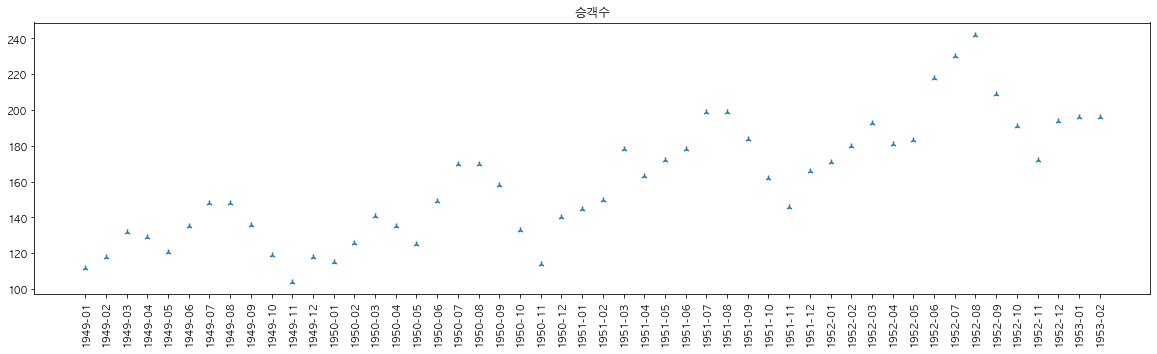

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import platform
from matplotlib import font_manager, rc

#매킨토시의 경우
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
#윈도우의 경우
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

#산점도는 평균과 분산의 증가를 명확히 보여주지만 계절적인 변동의 추세를 확인하는 것은 어려움
plt.figure(figsize=(20, 5))
plt.xticks(size=10, rotation='vertical')
plt.scatter(x=air['Date'][0:50],y=air['Passengers'][0:50], marker='2')
plt.title('승객수')
plt.show()

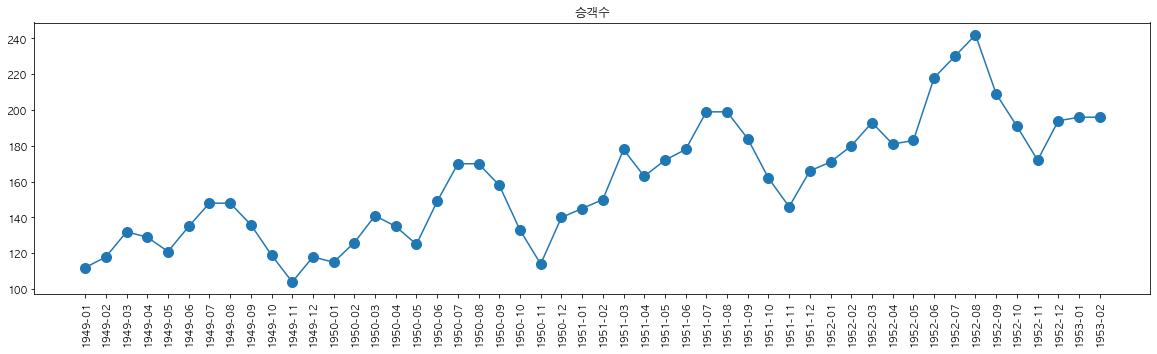

In [32]:
plt.figure(figsize=(20, 5))
plt.xticks(size=10, rotation='vertical')
plt.plot(air['Date'][0:50], air['Passengers'][0:50], marker='o', markersize=10)  
plt.title('승객수')
plt.show()